# Group 10: Mental Health & Lifestyle


# Project Introduction

**Github Project Link:**

https://github.com/cs418-fa24/project-check-in-team-10

**Modeling Mental Health & Lifestyle Choice**\
This project explores the relationships between lifestyle choices and their significant impact on individuals' overall mental health. Our team believes that this is an important investigation, with the potential to provide actionable insights and support informed decisions that promote mental well-being. We analyze data from the 2023 Behavioral Risk Factor Surveillance System (BRFSS) which includes over 430,000 participants across the U.S. This survey data contains health related behaviors and outcomes from various factors.
Our primary research question is **How do lifestyle choices like excericse, smoking and alcohol consumption impact self-reported mental health?**. We are interested in identifying patterns that reveal whether engaging in a healthier lifestyle correlates with better mental health outcomes, against the number of days per month respondents report experiencing poor mental health. To answer our question, we explore the potential cases and relationships between these factors accounting for demographic factors: age, education, and income. We hope to generate insights that not only support individual decision-making but also inform public health recommendations, ultimately promoting wellness through positive lifestyle changes.

# Any Changes?
We haven’t changed our dataset or main idea; the core focus is still the same. However, after narrowing down our data, we have a much clearer view of what we want to explore and which features to cross-check for relationships. Given the size of our dataset, we decided not to bring in any additional data sources. Instead, we’ve spent a lot of time on data cleaning and exploration to understand it better. Our goal now is to sharpen our research question by diving deeper into the interactions between specific characteristics and focusing on key areas within the dataset. This way, our analysis stays focused and meaningful.

# Why This Hypothesis Is Interesting:
We chose to investigate the hypothesis that lifestyle factors like exercise, smoking, and alcohol consumption are linked to mental health outcomes because it addresses a relevant public health question. Understanding these relationships can provide insights that contribute to preventive strategies and targeted interventions. It’s important to understand whether changes in lifestyle behaviors correlate with better mental health, as this could inform both personal decision-making and public health recommendations. We hope to uncover patterns that validate or challenge common beliefs about mental health and lifestyle. If used in actual health care scenarios peoples lives may be at stake by early prevention.

# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'output.csv'

## Features Selected

In [4]:
columns_of_interest = [
    '_STATE', 'MENTHLTH', '_AGEG5YR',  '_RACEGR3', 'EDUCA', '_EDUCAG',
    'INCOME3', 'MARITAL', 'EMPLOY1', '_TOTINDA',
     '_SMOKER3', 'GENHLTH', 'PHYSHLTH', 'DIABETE4',
      'FLUSHOT7', 'HIVTST7', 'DRNKANY6', '_RFBING6', '_HLTHPL1'
]
# Load the dataset with only the relevant columns
df = pd.read_csv(file_path, usecols=columns_of_interest)

In [5]:
df[df["GENHLTH"].isna()]

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,DIABETE4,MARITAL,EDUCA,EMPLOY1,INCOME3,FLUSHOT7,HIVTST7,_HLTHPL1,_TOTINDA,_RACEGR3,_AGEG5YR,_EDUCAG,_SMOKER3,DRNKANY6,_RFBING6
132518,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,9.0,9.0,9.0,14.0,9.0,9.0,9.0,9.0
137672,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,9.0,9.0,9.0,14.0,9.0,9.0,9.0,9.0
337109,47.0,NaN,88.0,88.0,3.0,5.0,4.0,8.0,NaN,NaN,NaN,1.0,1.0,1.0,3.0,2.0,9.0,9.0,9.0
432232,78.0,NaN,30.0,30.0,3.0,1.0,9.0,2.0,77.0,2.0,1.0,2.0,2.0,5.0,9.0,9.0,4.0,2.0,1.0


# Data Cleaning Introduction

This imputation method is a distribution-based approach that fills in missing values by sampling from an observed distribution specific to a group or category, such as Age or State. This method ensuyres that imputed values reflect realistic variations within our data, preserving important patterns.

In this approach, missing values are imputed by sampling from the distribution observed within the relevant group (e.g., age group, geographic area, etc.). For example, if age groups or regions exhibit unique distributions, this method captures that diversity by assigning values based on those observed proportions. This helps to maintain the dataset's natural variability without introducing artificial bias.

Within our data, we see that instances where individuals do not respond or refuse to respond to the question. These are denoted by values such as 7, 77, 777, 9, 99, 999, 14, and more. These values will be treated as and converted to null.

Additionally, values where the count of null values count to approximately 10,000 will be dropped, and columns where the count of null values are greater than 10,0000 will be imputed. 

In [6]:
df['EMPLOY1'] = df['EMPLOY1'].replace(9, pd.NA)
df['MARITAL'] = df['MARITAL'].replace(9, pd.NA)
df['MENTHLTH'] = df['MENTHLTH'].replace([77	,99	], pd.NA)
df['MENTHLTH'] = df['MENTHLTH'].replace(88, 0)
df['_AGEG5YR'] = df['_AGEG5YR'].replace(14, pd.NA)
df['_RACEGR3'] = df['_RACEGR3'].replace(9, pd.NA)
df['EDUCA'] = df['EDUCA'].replace(9, pd.NA)
df['MARITAL'] = df['MARITAL'].replace(9, pd.NA)
df['EMPLOY1'] = df['EMPLOY1'].replace(9, pd.NA)
df['_TOTINDA'] = df['_TOTINDA'].replace(9, pd.NA)
df['GENHLTH'] = df['GENHLTH'].replace([7,9], pd.NA)
df['PHYSHLTH'] = df['PHYSHLTH'].replace([77,99], pd.NA)
df['PHYSHLTH'] = df['PHYSHLTH'].replace(88, 0)

df['DIABETE4'] = df['DIABETE4'].replace([7,9], pd.NA)

small_missing_features = ['GENHLTH', 'MENTHLTH', 'PHYSHLTH' 
                          , 'DIABETE4',
                          'PHYSHLTH', 'MARITAL', 'EDUCA', '_RACEGR3', 'EMPLOY1', '_AGEG5YR',
                          '_TOTINDA', 'PHYSHLTH', 'GENHLTH'
                         ]
df = df.dropna(subset=small_missing_features)


In [7]:
print(df.isnull().sum())

_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3      4344
FLUSHOT7    20897
HIVTST7     22506
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6        0
_RFBING6        0
dtype: int64


In [8]:
df.loc[:, 'INCOME3'] = df['INCOME3'].replace([77, 99], pd.NA)

print(df.isnull().sum())

_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3     67192
FLUSHOT7    20897
HIVTST7     22506
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6        0
_RFBING6        0
dtype: int64


/var/folders/jq/t300n9xj6s9f_tfkr257bydw0000gn/T/ipykernel_49850/3690891805.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[<NA> <NA> 2.0 ... 10.0 3.0 2.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'INCOME3'] = df['INCOME3'].replace([77, 99], pd.NA)


In [17]:
df.to_csv('pre_imputation_data.csv', index=False)

### Imputing the Income Variable

In [9]:
income_dist = (
    df[df['INCOME3'].notna()]
    .groupby('_STATE')['INCOME3']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

In [10]:
def impute_income(row):
    if pd.isna(row['INCOME3']):
        state_dist = income_dist.loc[row['_STATE']]
        return np.random.choice(state_dist.index, p=state_dist.values)
    else:
        return row['INCOME3']

In [11]:
original_dist = df['INCOME3'].value_counts(normalize=True)
df['INCOME3'] = df.apply(impute_income, axis=1)

imputed_dist = df['INCOME3'].value_counts(normalize=True)


In [12]:
original_dist

INCOME3
7.0     0.167805
9.0     0.154305
8.0     0.143815
6.0     0.135740
5.0     0.108629
11.0    0.079286
10.0    0.072085
4.0     0.050765
3.0     0.035420
2.0     0.026994
1.0     0.025156
Name: proportion, dtype: float64

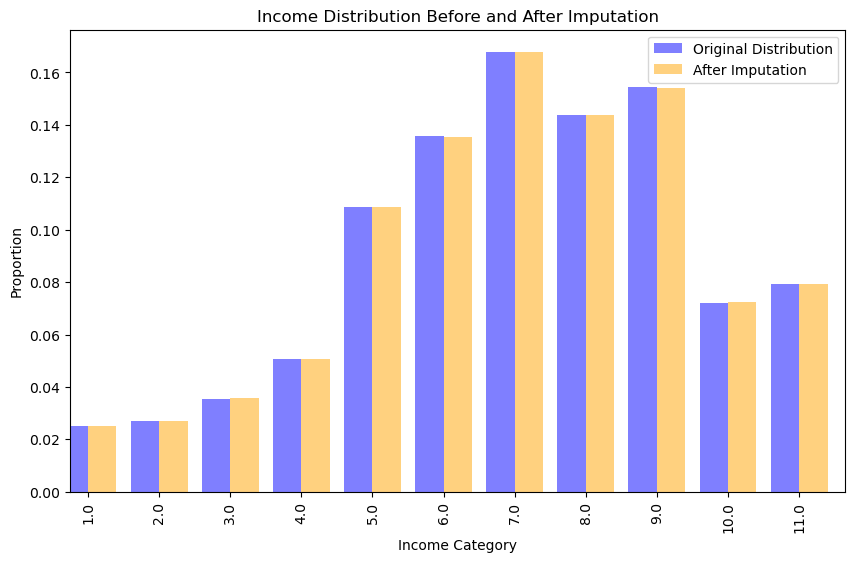

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Income Category')
plt.ylabel('Proportion')
plt.title('Income Distribution Before and After Imputation')
plt.legend()
plt.show()


### Imputing the variable of whether an individual has taken a flu shot

In [14]:


df['FLUSHOT7'] = df['FLUSHOT7'].replace([7, 9], pd.NA)
print(df.isnull().sum())
age_state_dist = (
    df[df['FLUSHOT7'].notna()]
    .groupby(['_AGEG5YR', '_STATE'])['FLUSHOT7']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_place(row):
    if pd.isna(row['FLUSHOT7']):
        try:
            age_state_probs = age_state_dist.loc[(row['AGE'], row['STATE'])]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['FLUSHOT7'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['FLUSHOT7']



_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3         0
FLUSHOT7    23521
HIVTST7     22506
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6        0
_RFBING6        0
dtype: int64


In [16]:
original_dist = df['FLUSHOT7'].value_counts(normalize=True)
df['FLUSHOT7'] = df.apply(impute_place, axis=1)

imputed_dist = df['FLUSHOT7'].value_counts(normalize=True)


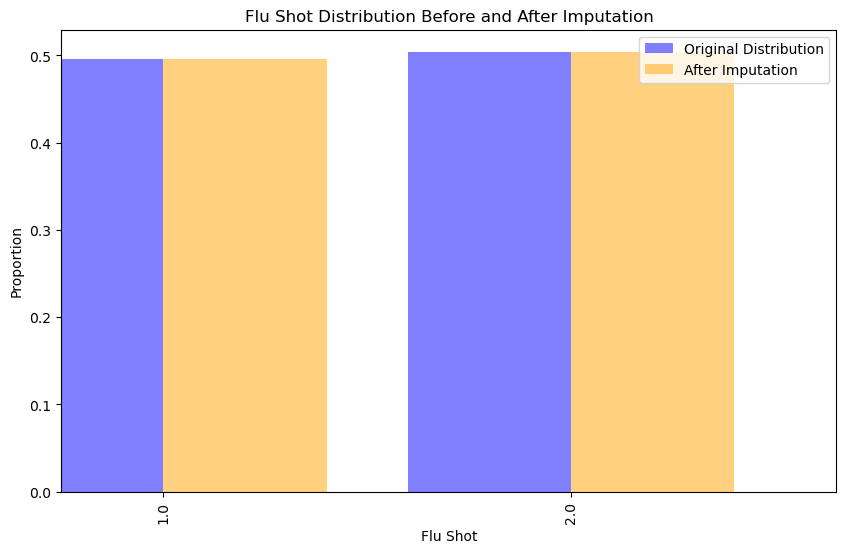

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Flu Shot')
plt.ylabel('Proportion')
plt.title('Flu Shot Distribution Before and After Imputation')
plt.legend()
plt.show()


### Column regarding whether an individual has ever tested for HIV

In [18]:

df['HIVTST7'] = df['HIVTST7'].replace([7, 9], pd.NA)
print(df.isnull().sum())
age_state_dist = (
    df[df['HIVTST7'].notna()]
    .groupby(['_AGEG5YR'])['HIVTST7']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_hiv(row):
    if pd.isna(row['HIVTST7']):
        try:
            age_state_probs = age_state_dist.loc[row['AGE']]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['HIVTST7'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['HIVTST7']


_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3         0
FLUSHOT7        0
HIVTST7     40497
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6        0
_RFBING6        0
dtype: int64


In [19]:
original_dist = df['HIVTST7'].value_counts(normalize=True)
df['HIVTST7'] = df.apply(impute_hiv, axis=1)

imputed_dist = df['HIVTST7'].value_counts(normalize=True)

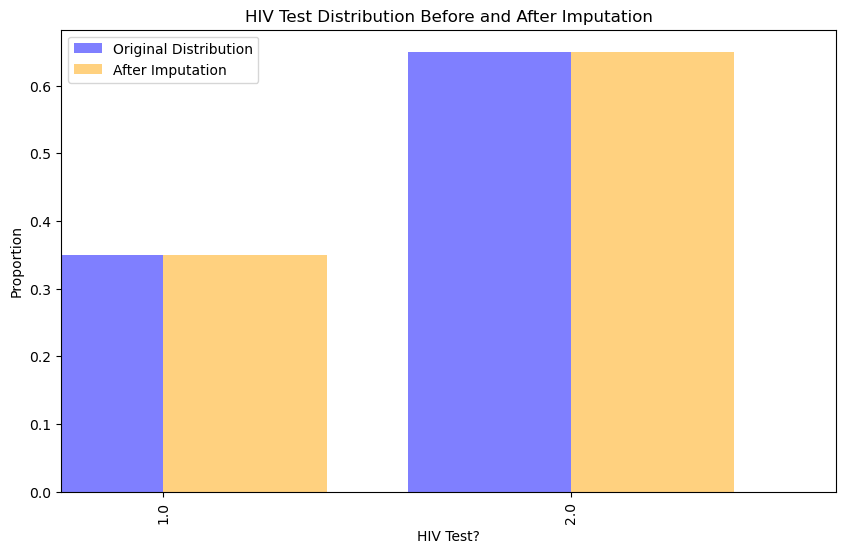

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('HIV Test?')
plt.ylabel('Proportion')
plt.title('HIV Test Distribution Before and After Imputation')
plt.legend()
plt.show()


# Imputation for Number of Days Physical Health not good

In [21]:
age_state_dist = (
    df[df['PHYSHLTH'].notna()]
    .groupby(['_AGEG5YR'])['PHYSHLTH']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_phys(row):
    if pd.isna(row['PHYSHLTH']):
        try:
            age_state_probs = age_state_dist.loc[row['AGE']]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['PHYSHLTH'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['PHYSHLTH']


In [22]:
original_dist = df['PHYSHLTH'].value_counts(normalize=True)
df['PHYSHLTH'] = df.apply(impute_phys, axis=1)

imputed_dist = df['PHYSHLTH'].value_counts(normalize=True)

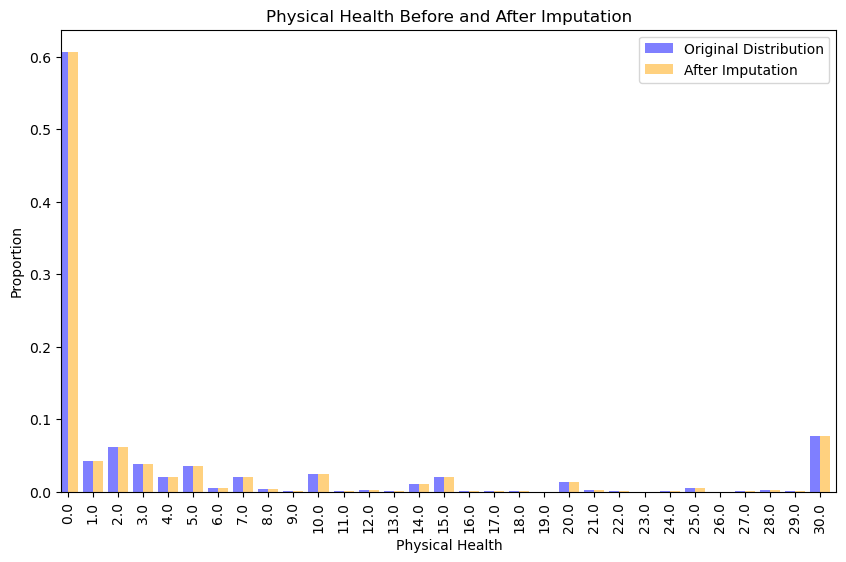

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Physical Health')
plt.ylabel('Proportion')
plt.title('Physical Health Before and After Imputation')
plt.legend()
plt.show()


### Imputation for if individual has drank an alcoholic beverage in the past 30 days

In [24]:

df['DRNKANY6'] = df['DRNKANY6'].replace([7, 9], pd.NA)
print(df.isnull().sum())
age_state_dist = (
    df[df['DRNKANY6'].notna()]
    .groupby(['_AGEG5YR'])['DRNKANY6']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_drink(row):
    if pd.isna(row['DRNKANY6']):
        try:
            age_state_probs = age_state_dist.loc[row['AGE']]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['DRNKANY6'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['DRNKANY6']


_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3         0
FLUSHOT7        0
HIVTST7         0
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6    21995
_RFBING6        0
dtype: int64


In [ ]:
original_dist = df['DRNKANY6'].value_counts(normalize=True)
df['DRNKANY6'] = df.apply(impute_drink, axis=1)
imputed_dist = df['DRNKANY6'].value_counts(normalize=True)

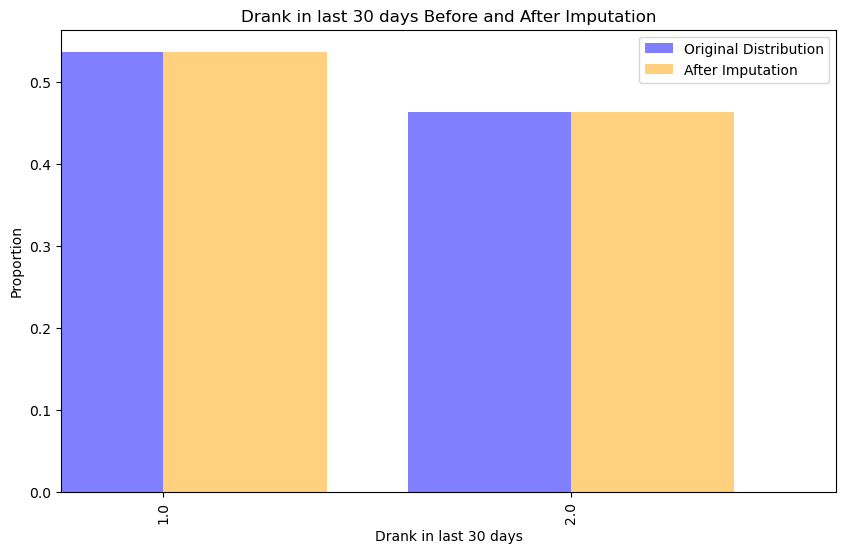

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Drank in last 30 days')
plt.ylabel('Proportion')
plt.title('Drank in last 30 days Before and After Imputation')
plt.legend()
plt.show()


### Imputation for Variable on if individual is a binge drinker

In [ ]:

df['_RFBING6'] = df['_RFBING6'].replace(9, pd.NA)
print(df.isnull().sum())
age_state_dist = (
    df[df['_RFBING6'].notna()]
    .groupby(['_AGEG5YR'])['_RFBING6']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_binge(row):
    if pd.isna(row['_RFBING6']):
        try:
            age_state_probs = age_state_dist.loc[row['AGE']]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['_RFBING6'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['_RFBING6']

_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3         0
FLUSHOT7        0
HIVTST7         0
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6        0
_RFBING6    24775
dtype: int64


In [ ]:
original_dist = df['_RFBING6'].value_counts(normalize=True)
df['_RFBING6'] = df.apply(impute_binge, axis=1)
imputed_dist = df['_RFBING6'].value_counts(normalize=True)

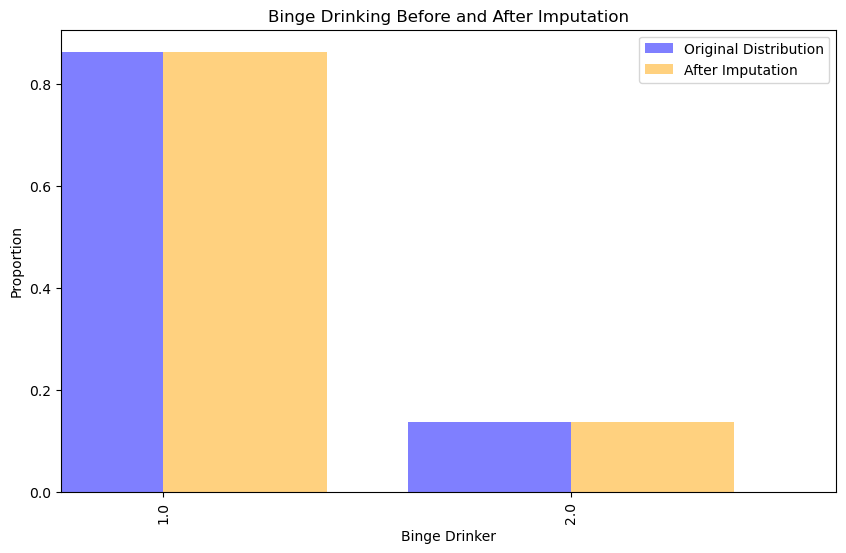

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Binge Drinker')
plt.ylabel('Proportion')
plt.title('Binge Drinking Before and After Imputation')
plt.legend()
plt.show()


### Imputation for variable of whether or not individual Smokes, as well as how consistently they smoke

In [ ]:

df['_SMOKER3'] = df['_SMOKER3'].replace(9, pd.NA)
print(df.isnull().sum())
age_state_dist = (
    df[df['_SMOKER3'].notna()]
    .groupby(['_AGEG5YR'])['_SMOKER3']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_smoke(row):
    if pd.isna(row['_SMOKER3']):
        try:
            age_state_probs = age_state_dist.loc[row['AGE']]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['_SMOKER3'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['_SMOKER3']

_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3         0
FLUSHOT7        0
HIVTST7         0
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3    16348
DRNKANY6        0
_RFBING6        0
dtype: int64


In [ ]:
original_dist = df['_SMOKER3'].value_counts(normalize=True)
df['_SMOKER3'] = df.apply(impute_smoke, axis=1)
imputed_dist = df['_SMOKER3'].value_counts(normalize=True)

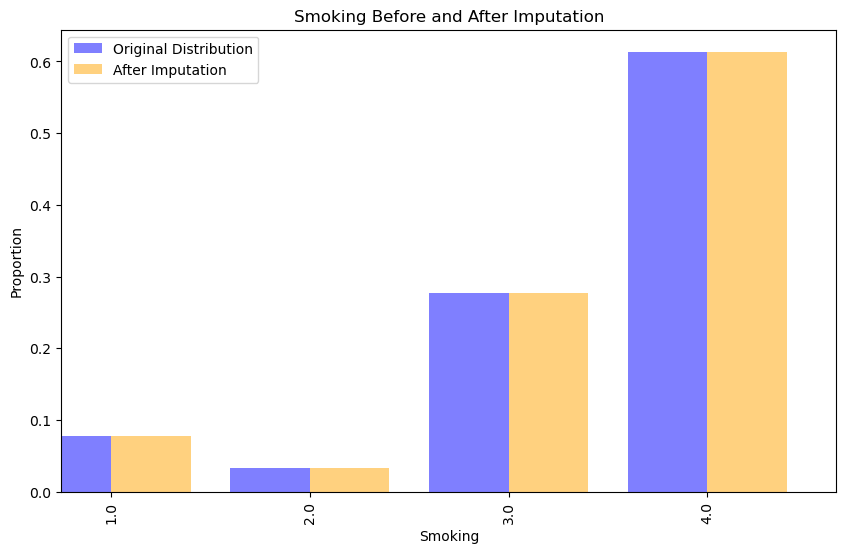

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Smoking')
plt.ylabel('Proportion')
plt.title('Smoking Before and After Imputation')
plt.legend()
plt.show()

### Imputation for variable of if the individual has Health Insurance

In [ ]:
df['_HLTHPL1'] = df['_HLTHPL1'].replace(9, pd.NA)
print(df.isnull().sum())
age_state_dist = (
    df[df['_HLTHPL1'].notna()]
    .groupby(['_AGEG5YR'])['_HLTHPL1']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_insure(row):
    if pd.isna(row['_HLTHPL1']):
        try:
            age_state_probs = age_state_dist.loc[row['AGE']]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['_HLTHPL1'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['_HLTHPL1']

_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3         0
FLUSHOT7        0
HIVTST7         0
_HLTHPL1    13559
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6        0
_RFBING6        0
dtype: int64


In [ ]:
original_dist = df['_HLTHPL1'].value_counts(normalize=True)
df['_HLTHPL1'] = df.apply(impute_insure, axis=1)
imputed_dist = df['_HLTHPL1'].value_counts(normalize=True)

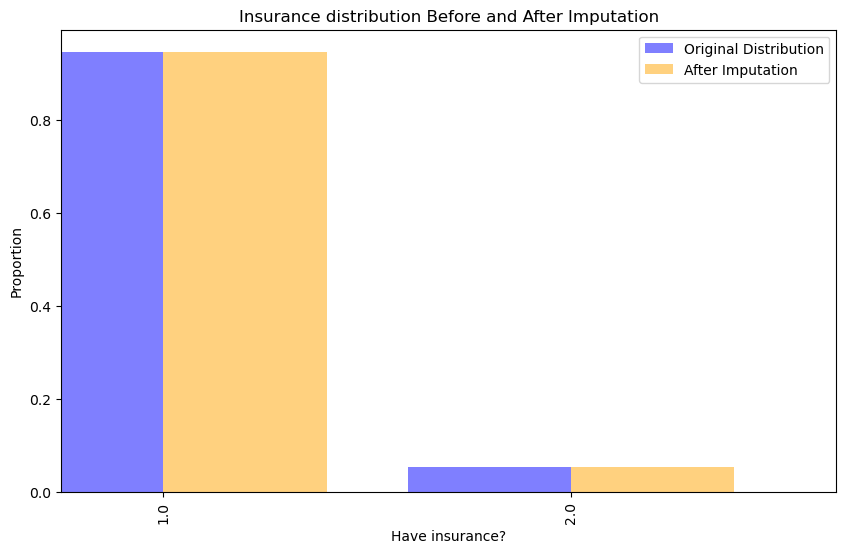

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Have insurance?')
plt.ylabel('Proportion')
plt.title('Insurance distribution Before and After Imputation')
plt.legend()
plt.show()

In [ ]:
df.to_csv('imputed_data.csv', index=False)

## EDA

### Categorical Data Analysis:

In [25]:
cleaned_df = pd.read_csv('imputed_data.csv')


In [26]:
# changing:     '_STATE', 'MENTHLTH', '_AGEG5YR',  '_RACEGR3', 'EDUCA', '_EDUCAG',
#               'INCOME3', 'MARITAL', 'EMPLOY1', '_TOTINDA',
#                '_SMOKER3', 'GENHLTH', 'PHYSHLTH', 'DIABETE4',
#                'FLUSHOT7', 'HIVTST7', 'DRNKANY6', '_RFBING6', '_HLTHPL1',

# changing GENHLTH values: 1: Excellent, 2: Very good, 3: Good, 4: Fair, 5: Poor
cleaned_df['GENHLTH'] = cleaned_df['GENHLTH'].replace({1: 'Excellent', 2: 'Very good', 3: 'Good', 4: 'Fair', 5: 'Poor'})

genhlth_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
cleaned_df['GENHLTH'] = pd.Categorical(cleaned_df['GENHLTH'], categories=genhlth_order, ordered=True)

# changing MENTHLTH values: 88: None
cleaned_df['MENTHLTH'] = cleaned_df['MENTHLTH'].replace({88: 0})

# changing PHYSHLTH values: 88: 0
cleaned_df['PHYSHLTH'] = cleaned_df['PHYSHLTH'].replace({88: 0})


# changing DIABETE4 values: 1: Yes, 2: Yes, but female told only during pregnancy, 3: No, 4: No, pre-diabetes or borderline diabetes 
cleaned_df['DIABETE4'] = cleaned_df['DIABETE4'].replace({1: 'Yes', 2: 'Yes, but female told only during pregnancy', 3: 'No', 
                                                         4: 'No, pre-diabetes or borderline diabetes'})

# changing MARITAL values: 1: Married, 2: Divorced, 3: Widowed, 4: Separated, 5: Never married, 6: A member of an unmarried couple
cleaned_df['MARITAL'] = cleaned_df['MARITAL'].replace({1: 'Married', 2: 'Divorced', 3: 'Widowed', 4: 'Separated', 5: 'Never married',
                                                       6: 'A member of an unmarried couple'})

# changing EDUCA values: 
#   1: Never attended school or only kindergarten, 
#   2: Grades 1 through 8 (Elementary), 
#   3: Grades 9 through 11 (Some high school), 
#   4: Grade 12 or GED (High school graduate), 
#   5: College 1 year to 3 years (Some college or technical school), 
#   6: College 4 years or more (College graduate), 
cleaned_df['EDUCA'] = cleaned_df['EDUCA'].replace({1: 'Never attended school or only kindergarten',
                                                   2: 'Grades 1 through 8 (Elementary)', 
                                                   3: 'Grades 9 through 11 (Some high school)', 
                                                   4: 'Grade 12 or GED (High school graduate)',
                                                   5: 'College 1 year to 3 years (Some college or technical school)',
                                                   6: 'College 4 years or more (College graduate)'})

educa_order = ['Never attended school or only kindergarten', 'Grades 1 through 8 (Elementary)',
               'Grades 9 through 11 (Some high school)', 'Grade 12 or GED (High school graduate)', 
               'College 1 year to 3 years (Some college or technical school)', 
               'College 4 years or more (College graduate)']

cleaned_df['EDUCA'] = pd.Categorical(cleaned_df['EDUCA'], categories=educa_order, ordered=True)


# changing EMPLOY1 values: 
#   1: Employed for wages, 
#   2: Self-employed,
#   3: Out of work for 1 year or more, 
#   4: Out of work for less than 1 year, 
#   5: A homemaker, 
#   6: A student, 
#   7: Retired, 
#   8: Unable to work, 
#   9: Refused
cleaned_df['EMPLOY1'] = cleaned_df['EMPLOY1'].replace({1: 'Employed for wages',
                                                       2: 'Self-employed',
                                                       3: 'Out of work for 1 year or more', 
                                                       4: 'Out of work for less than 1 year',
                                                       5: 'A homemaker',
                                                       6: 'A student',
                                                       7: 'Retired', 
                                                       8: 'Unable to work'})

# changing INCOME3 values:
#   1: Less than $10,000,
#   2: Less than $15,000
#   3: Less than $20,000
#   4: Less than $25,000
#   5: Less than $35,000
#   7: Less than $50,000
#   8: Less than $75,000
#   9: Less than $100,000
#   10: Less than $150,000
#   11: Less than $200,000
#   12: $200,000 or more
#   77: Not sure
#   99: Refused
cleaned_df['INCOME3'] = cleaned_df['INCOME3'].replace({1: 'Less than $10,000',
                                                       2: 'Less than $15,000', 
                                                       3: 'Less than $20,000', 
                                                       4: 'Less than $25,000',
                                                       5: 'Less than $35,000',
                                                       7: 'Less than $50,000',
                                                       8: 'Less than $75,000',
                                                       9: 'Less than $100,000',
                                                       10: 'Less than $150,000',
                                                       11: 'Less than $200,000',
                                                       12: '$200,000 or more'})

income_order = ['Less than $10,000', 'Less than $15,000', 'Less than $20,000', 
                'Less than $25,000', 'Less than $35,000', 'Less than $50,000', 
                'Less than $75,000', 'Less than $100,000', 'Less than $150,000', 
                'Less than $200,000', '$200,000 or more']

cleaned_df['INCOME3'] = pd.Categorical(cleaned_df['INCOME3'], categories=income_order, ordered=True)


# changing FLUSHOT7 values: 1: Yes, 2: No
cleaned_df['FLUSHOT7'] = cleaned_df['FLUSHOT7'].replace({1: 'Yes', 2: 'No'})

# changing HIVTST7 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['HIVTST7'] = cleaned_df['HIVTST7'].replace({1: 'Yes', 2: 'No'})

# changing _TOTINDA values: 1: Yes, 2: No
cleaned_df['_TOTINDA'] = cleaned_df['_TOTINDA'].replace({1: 'Yes', 2: 'No'})

# changing _RACEGR3 values: 
#   1: White only, Non-Hispanic, 
#   2: Black only, Non-Hispanic,
#   3: Other race only, Non-Hispanic,
#   4: Multiracial, Non-Hispanic,
#   5: Hispanic,
#   9: Not sure/Refused
cleaned_df['_RACEGR3'] = cleaned_df['_RACEGR3'].replace({1: 'White only,Non-Hispanic', 2: 'Black only, Non-Hispanic', 3: 'Other race only, Non-Hispanic', 4: 'Multiracial, Non-Hispanic', 5: 'Hispanic', 9: 'Not sure/Refused'})

# changing _AGEG5YR values:
#   1: 18-24 years,
#   2: 25-29 years,
#   3: 30-34 years,
#   4: 35-39 years,
#   5: 40-44 years,
#   6: 45-49 years,
#   7: 50-54 years,
#   8: 55-59 years,
#   9: 60-64 years,
#   10: 65-69 years,
#   11: 70-74 years,
#   12: 75-79 years,
#   13: 80 or older
cleaned_df['_AGEG5YR'] = cleaned_df['_AGEG5YR'].replace({1: '18-24 years', 2: '25-29 years',
                                                         3: '30-34 years', 4: '35-39 years', 5: '40-44 years',
                                                         6: '45-49 years', 7: '50-54 years', 8: '55-59 years', 
                                                         9: '60-64 years', 10: '65-69 years', 11: '70-74 years',
                                                         12: '75-79 years', 13: '80 or older'})

age_order = ['18-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years',
             '45-49 years', '50-54 years', '55-59 years', '60-64 years', '65-69 years',
             '70-74 years', '75-79 years', '80 or older']

cleaned_df['_AGEG5YR'] = pd.Categorical(cleaned_df['_AGEG5YR'], categories=age_order, ordered=True)

cleaned_df['_SMOKER3'] = cleaned_df['_SMOKER3'].replace({1: 'Current smoker - now smokes every day', 
                                                         2: 'Current smoker - now smokes some days', 
                                                         3: 'Former smoker',
                                                         4: 'Never smoked',
                                                         9: 'Not sure/Refused'})

# changing _EDUCAG values:
#   1: Did not graduate High School
#   2: Graduated High School
#   3: Attended College or Technical School
#   4: Graduated from College or Technical School
cleaned_df['_EDUCAG'] = cleaned_df['_EDUCAG'].replace({1: 'Did not graduate High School',
                                                       2: 'Graduated High School',
                                                       3: 'Attended College or Technical School', 
                                                       4: 'Graduated from College or Technical School'})


In [27]:
# adding variable labels for 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'EXERANY2', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'DIABETE4', 'MARITAL', 'EDUCA', 'EMPLOY1', 'INCOME3', 'SMOKE100', 'SMOKDAY2', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'HIVTST7', '_TOTINDA', '_RACEGR3', '_AGEG5YR', '_AGE65YR', '_EDUCAG', '_INCOMG1', '_RFSMOK3'


var_labels = {
    'GENHLTH': 'General health',
    'PHYSHLTH': 'Number of Days Physical Health Not Good',
    'MENTHLTH': 'Number of Days Mental Health Not Good',
    'POORHLTH': 'Poor Physical or Mental Health',
    'EXERANY2': 'Exercise in the past 30 days',
    'CHCSCNC1': 'Ever told you had skin cancer',
    'CHCOCNC1': 'Ever told you had cancer (excluding skin cancer)',
    'CHCCOPD3': 'Ever told you had C.O.P.D. emphysema or chronic bronchitis?',
    'DIABETE4': 'Ever told you had diabetes',
    'MARITAL': 'Marital status',
    'EDUCA': 'Education level',
    'EMPLOY1': 'Employment status',
    'INCOME3': 'Income level',
    'SMOKE100': ' Smoked at Least 100 Cigarettes',
    'SMOKDAY2': 'Frequency of Days Now Smoking',
    'ALCDAY4': 'Days drink alcohol in the past 30 days',
    'AVEDRNK3': 'Avg alcoholic drinks per day in past 30',
    'DRNK3GE5': 'Binge drinking',
    'MAXDRNKS': 'Maximum number of drinks in past month',
    'FLUSHOT7': 'Adult flu shot/spray past 12 mos',
    'HIVTST7': 'Ever tested H.I.V.',
    '_TOTINDA': 'Adults who reported doing physical activity or exercise during the past 30 days other than their regular job',
    '_RACEGR3': ' Five-level race/ethnicity category',
    '_AGEG5YR': ' Fourteen-level age category',
    '_AGE65YR': ' Two-level age category',
    '_EDUCAG': ' Level of education completed',
    '_INCOMG1': ' Income categories',
    '_RFSMOK3': ' Is a current smoker?',
    '_HLTHPL1': 'Do you have Health Insurance?'
}

# Exclude Refused and Not sure in MENTHLTH
cleaned_df = cleaned_df[~cleaned_df['MENTHLTH'].isin(['Refused', 'Not sure'])]
cleaned_df['_AGEG5YR'] = pd.Categorical(cleaned_df['_AGEG5YR'], categories=age_order, ordered=True)

# Plotting:

In [28]:
selected_colors = [
    "#FFEA85",  # Pineapple Soda
    "#F698DB",  # Berry Pop
    "#E1EEAF",  # Palm Leaf
    "#FFD3E4",  # Cherry Blossom
    "#92D1FF",  # Pool Day
    "#FFD058",  # Lemonade Stand
    "#AFDFEE",  # Blue Lagoon
    "#FFBDB4",  # Peach Smoothie
    "#F1EBE4",  # Coconut Milk
    "#F72967",  # Raspberry Sorbet
    "#4BC6D7",  # Splish Splash
    "#BCACDD"   # Fresh Lavender
]

boolean_colors = ["#E1EEAF", "#F698DB"]

color_palette = dict(zip(genhlth_order, selected_colors))

/var/folders/jq/t300n9xj6s9f_tfkr257bydw0000gn/T/ipykernel_49850/1328823111.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GENHLTH', y='MENTHLTH', data=cleaned_df, order=genhlth_order, palette=genhlth_palette)
/var/folders/jq/t300n9xj6s9f_tfkr257bydw0000gn/T/ipykernel_49850/1328823111.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0.95)` for the same effect.

  sns.pointplot(x='GENHLTH', y='MENTHLTH', data=cleaned_df, order=genhlth_order, ci = 0.95, color='black',


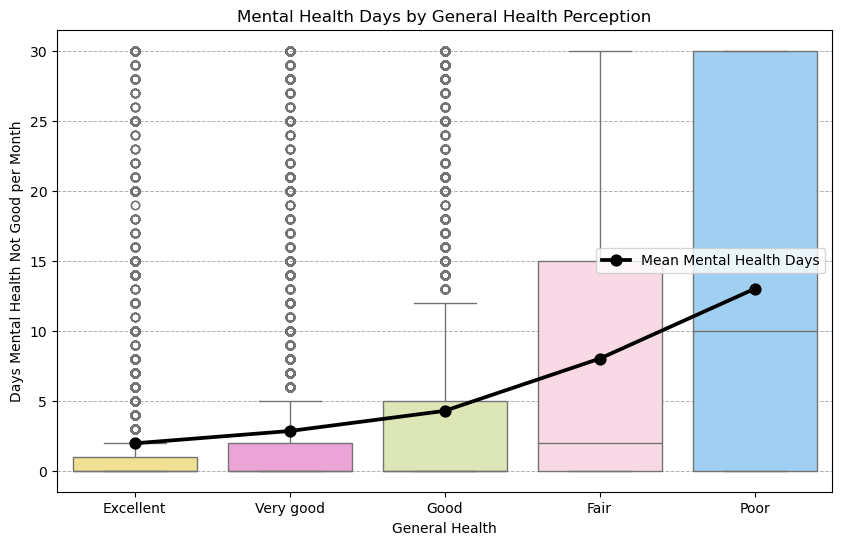

In [29]:
genhlth_palette = {
    'Excellent': "#FFEA85", 
    'Very good': "#F698DB", 
    'Good': "#E1EEAF",      
    'Fair': "#FFD3E4",      
    'Poor': "#92D1FF"       
}

genhlth_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']

plt.figure(figsize=(10, 6))
sns.boxplot(x='GENHLTH', y='MENTHLTH', data=cleaned_df, order=genhlth_order, palette=genhlth_palette)

#confidence intervals
sns.pointplot(x='GENHLTH', y='MENTHLTH', data=cleaned_df, order=genhlth_order, ci = 0.95, color='black', 
              markers='o', linestyles='-', label='Mean Mental Health Days')

plt.title('Mental Health Days by General Health Perception')
plt.xlabel('General Health')
plt.ylabel('Days Mental Health Not Good per Month')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend()  
plt.show()

H0: Mean number of days mental health is not good is the same across all general categories.nt

H1: At least one category is different

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('MENTHLTH ~ C(GENHLTH)', data=cleaned_df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq        df             F  PR(>F)
C(GENHLTH)  2.671337e+06       4.0  10835.442807     0.0
Residual    2.416056e+07  391999.0           NaN     NaN


F: 10835.442807

P = 0

Decision: Reject
H0

Conclusion: Since P is less than 0.05 we have enough evidence to reject the null hypothesis.

/var/folders/jq/t300n9xj6s9f_tfkr257bydw0000gn/T/ipykernel_49850/2731615294.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='MENTHLTH', y='_AGEG5YR', data=cleaned_df, order=age_order, palette=age_palette)


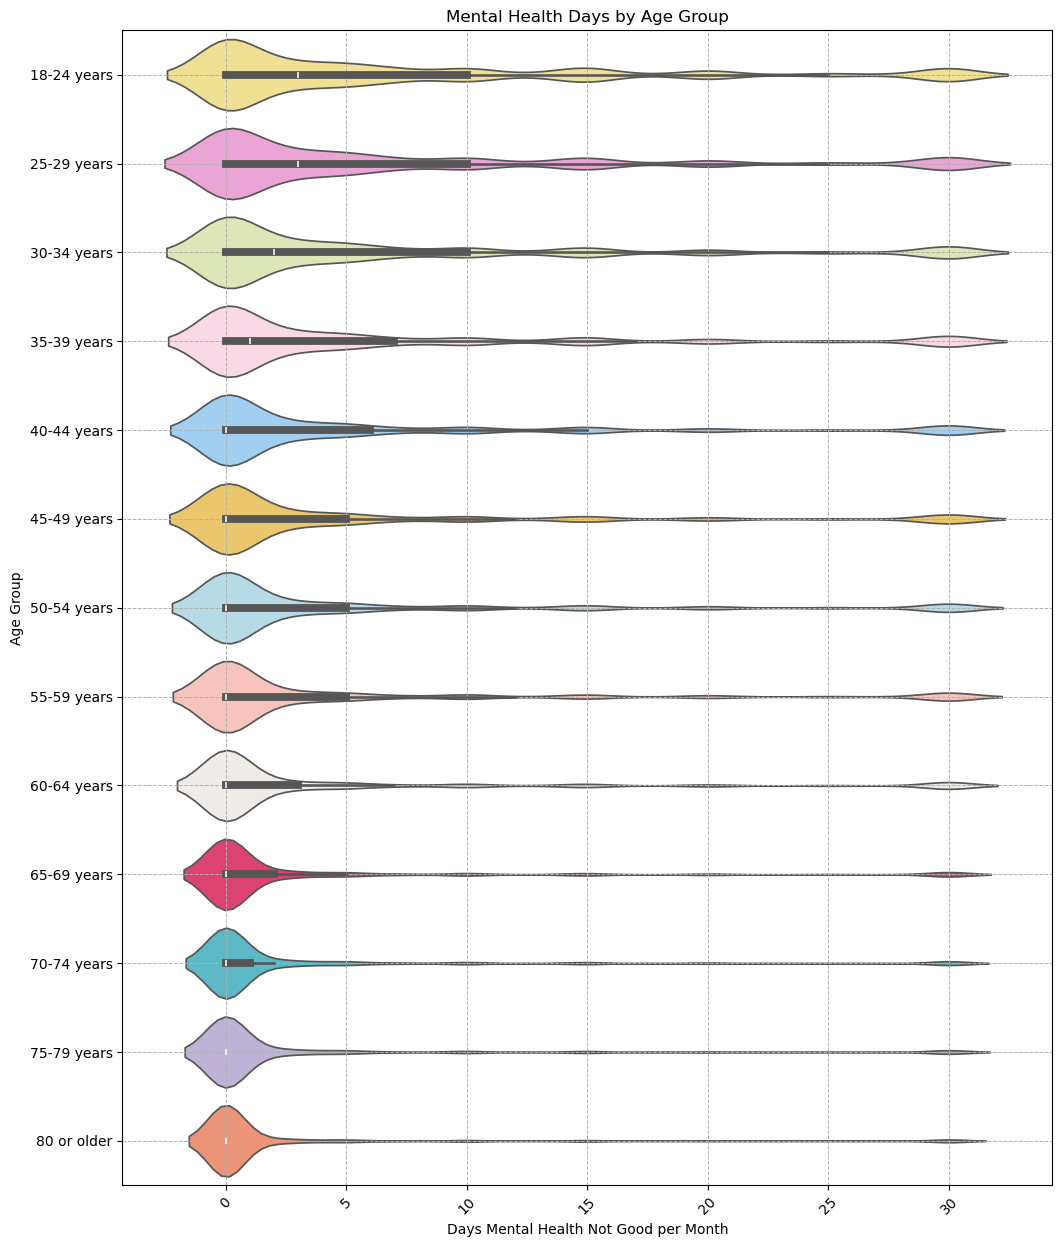

In [31]:
age_palette = {
    '18-24 years': "#FFEA85", 
    '25-29 years': "#F698DB",
    '30-34 years': "#E1EEAF",
    '35-39 years': "#FFD3E4",
    '40-44 years': "#92D1FF",
    '45-49 years': "#FFD058",
    '50-54 years': "#AFDFEE",
    '55-59 years': "#FFBDB4",
    '60-64 years': "#F1EBE4",
    '65-69 years': "#F72967",
    '70-74 years': "#4BC6D7",
    '75-79 years': "#BCACDD",
    '80 or older': "#FF8A65"
}

# Order for age categories
age_order = [
    '18-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years',
    '45-49 years', '50-54 years', '55-59 years', '60-64 years', '65-69 years',
    '70-74 years', '75-79 years', '80 or older'
]

# Violin plot for MENTHLTH across age groups with custom palette
plt.figure(figsize=(12, 15))  # Adjusted size to better fit age categories
sns.violinplot(x='MENTHLTH', y='_AGEG5YR', data=cleaned_df, order=age_order, palette=age_palette)

# Customize plot aesthetics
plt.title('Mental Health Days by Age Group')
plt.ylabel('Age Group')
plt.xlabel('Days Mental Health Not Good per Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)  # Light grid on y-axis
plt.grid(axis='x', linestyle='--', linewidth=0.7)  # Light grid on x-axis

plt.show()

H0: The meean number of days health is (not good) is the same for all age groups\
H1: Atleast one mean pair is not equal

In [32]:
model = ols('MENTHLTH ~ C(_AGEG5YR)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq        df            F  PR(>F)
C(_AGEG5YR)  9.736272e+05      12.0  1228.431714     0.0
Residual     2.592402e+07  392502.0          NaN     NaN


Test Statistic:\
F: 1228.431714\
P = 0

Decision:\
Reject H0

Conclusion:\
Since P = 0 is less than 0.05 so we have enough evidence to reject the null hypothesis. \



In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

cleaned_df = cleaned_df.dropna(subset=['MENTHLTH', '_AGEG5YR'])
tukey = pairwise_tukeyhsd(endog=cleaned_df['MENTHLTH'], groups=cleaned_df['_AGEG5YR'], alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
18-24 years 25-29 years  -0.3998    0.0 -0.6587 -0.1408   True
18-24 years 30-34 years   -0.786    0.0 -1.0344 -0.5376   True
18-24 years 35-39 years  -1.2961    0.0 -1.5388 -1.0534   True
18-24 years 40-44 years  -1.8488    0.0 -2.0887 -1.6089   True
18-24 years 45-49 years  -2.0559    0.0 -2.2986 -1.8133   True
18-24 years 50-54 years  -2.3157    0.0 -2.5502 -2.0812   True
18-24 years 55-59 years  -2.5462    0.0 -2.7761 -2.3164   True
18-24 years 60-64 years  -3.1308    0.0 -3.3516 -2.9099   True
18-24 years 65-69 years  -4.1111    0.0 -4.3282 -3.8941   True
18-24 years 70-74 years  -4.4619    0.0 -4.6814 -4.2424   True
18-24 years 75-79 years  -4.6279    0.0 -4.8582 -4.3976   True
18-24 years 80 or older  -5.0934    0.0 -5.3198  -4.867   True
25-29 years 30-34 years  -0.3863 0.0001 -0.6479 -0.1246

As seen above, the significant differences are between younger and older age groups which suggest a trend where mental health varies by age.
Particulary age groups 18-24 have fewer days of poor mental health compared to age groups 70-74 and 75-79. this is an indication that mental health issues are positively correlated with age.

/var/folders/jq/t300n9xj6s9f_tfkr257bydw0000gn/T/ipykernel_49850/2888751648.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=boolean_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


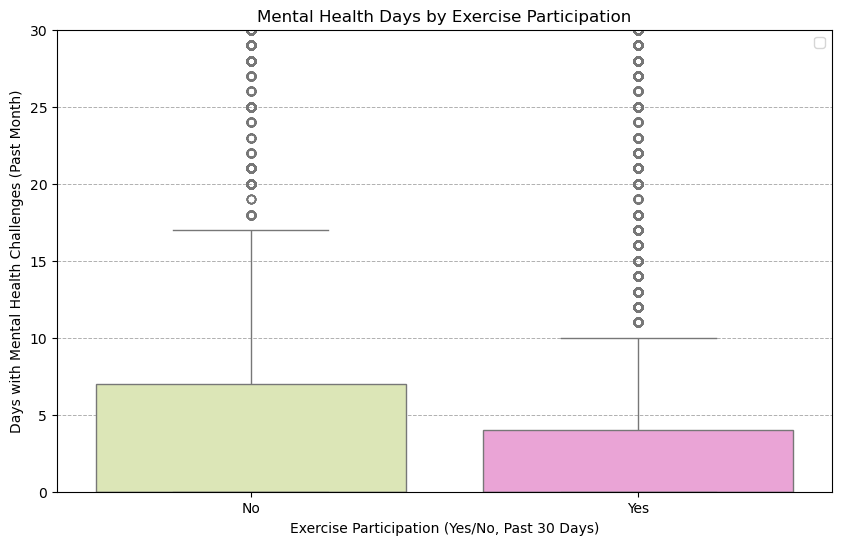

/var/folders/jq/t300n9xj6s9f_tfkr257bydw0000gn/T/ipykernel_49850/2888751648.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=boolean_colors)
/var/folders/jq/t300n9xj6s9f_tfkr257bydw0000gn/T/ipykernel_49850/2888751648.py:9: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=x, y=y, data=data, palette=boolean_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


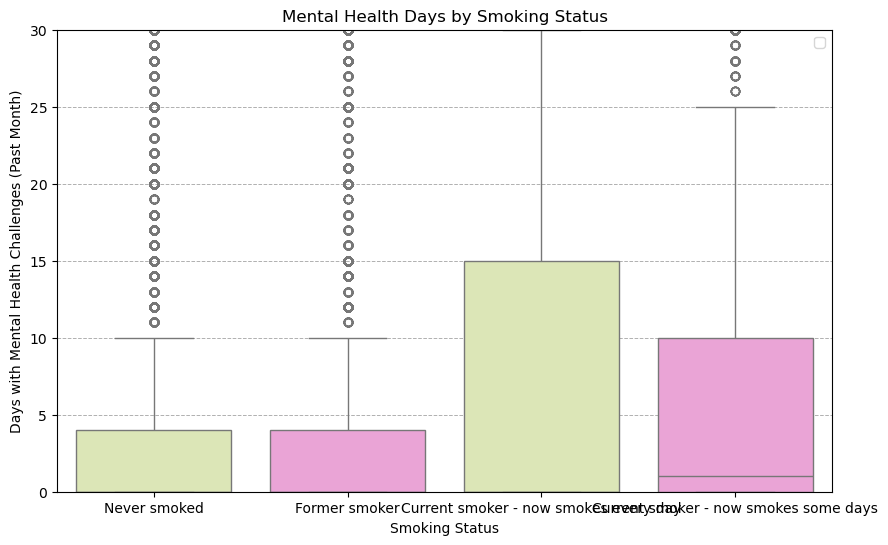

In [36]:
# Smoking Values
#    1. Current smoker - now smokes every day
#    2. Current smoker - now smokes some days
#    3. Former smoker
#    4. Never smoked

def enhanced_boxplot(data, x, y, title, xlabel, ylabel, palette=None):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=data, palette=boolean_colors)

    # Set y-axis limits if desired
    plt.ylim(0, 30)

    # Add grid, title, labels, and legend
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    
    plt.show()


# Plot for Exercise Participation
enhanced_boxplot(
    data=cleaned_df,
    x='_TOTINDA',
    y='MENTHLTH',
    title='Mental Health Days by Exercise Participation',
    xlabel='Exercise Participation (Yes/No, Past 30 Days)',
    ylabel='Days with Mental Health Challenges (Past Month)',
    palette=selected_colors
)

# Plot for Smoking Status
enhanced_boxplot(
    data=cleaned_df,
    x='_SMOKER3',
    y='MENTHLTH',
    title='Mental Health Days by Smoking Status',
    xlabel='Smoking Status',
    ylabel='Days with Mental Health Challenges (Past Month)',
    palette=selected_colors
)

H0: there is no difference with mental health challenges between individuals who exercise and those who don't\
H1: there is a difference in mean number of days with mental health challenges between individuals who excercised and didn't.

In [38]:
model = ols('MENTHLTH ~ C(_TOTINDA)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq        df            F  PR(>F)
C(_TOTINDA)  3.271355e+05       1.0  4832.611286     0.0
Residual     2.657051e+07  392513.0          NaN     NaN


Test Statistic:\
F: 4832.611286\
P = 0

Decision:\
Reject H0

Conclusion:\
Since P = 0 is less than 0.05,  we have enough evidence to reject the null hypothesis. \

/var/folders/jq/t300n9xj6s9f_tfkr257bydw0000gn/T/ipykernel_49850/1891173956.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_means = cleaned_df.groupby('INCOME3')['MENTHLTH'].mean().reindex(income_order)
/var/folders/jq/t300n9xj6s9f_tfkr257bydw0000gn/T/ipykernel_49850/1891173956.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='INCOME3', y='MENTHLTH', data=cleaned_df, order=income_order, palette=income_palette)


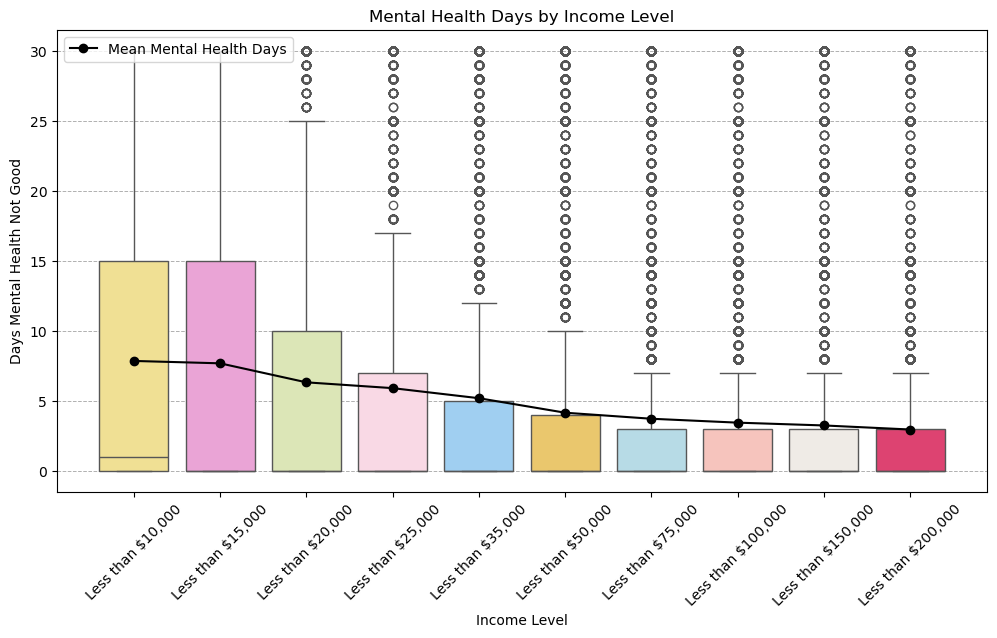

In [39]:
income_palette = {
    'Less than $10,000': "#FFEA85",
    'Less than $15,000': "#F698DB",
    'Less than $20,000': "#E1EEAF",
    'Less than $25,000': "#FFD3E4",
    'Less than $35,000': "#92D1FF",
    'Less than $50,000': "#FFD058",
    'Less than $75,000': "#AFDFEE",
    'Less than $100,000': "#FFBDB4",
    'Less than $150,000': "#F1EBE4",
    'Less than $200,000': "#F72967",
    '$200,000 or more': "#4BC6D7"
}

income_order = [
    'Less than $10,000', 'Less than $15,000', 'Less than $20,000', 'Less than $25,000',
    'Less than $35,000', 'Less than $50,000', 'Less than $75,000', 'Less than $100,000',
    'Less than $150,000', 'Less than $200,000', '$200,000 or more'
]

income_means = cleaned_df.groupby('INCOME3')['MENTHLTH'].mean().reindex(income_order)

plt.figure(figsize=(12, 6))
sns.boxplot(x='INCOME3', y='MENTHLTH', data=cleaned_df, order=income_order, palette=income_palette)
plt.plot(range(len(income_order)), income_means, color='black', marker='o', linestyle='-', label='Mean Mental Health Days')
plt.title('Mental Health Days by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Days Mental Health Not Good')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()

(H0): Income level does not have a significant effect on the number of days of poor mental health. (H1): Income level has a significant effect on the number of days of poor mental health

### Hypothesis Investigation Narrowed and Intersting insight

We chose to investigate the hypothesis that income level significantly affects the number of days individuals report poor mental health. This hypothesis is particularly compelling as socioeconomic status is often linked to mental health outcomes, yet there is still debate over the extent and consistency of this impact across different income brackets. Understanding this relationship can provide valuable insights for policymakers and health advocates seeking to allocate resources and support services to communities where they are most needed. 


In [ ]:
model = ols('MENTHLTH ~ C(INCOME3)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                  sum_sq        df           F  PR(>F)
C(INCOME3)  9.128847e+05      10.0  987.880902     0.0
Residual    1.109566e+07  120072.0         NaN     NaN


c:\Users\ikraa\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '



Test Statistic:\
F: 987.880902
P = 0

Decision:\
Reject H0

Conclusion:\
Since P = 0 is less than 0.05,  we have sufficient evidence to reject the null hypothesis. \


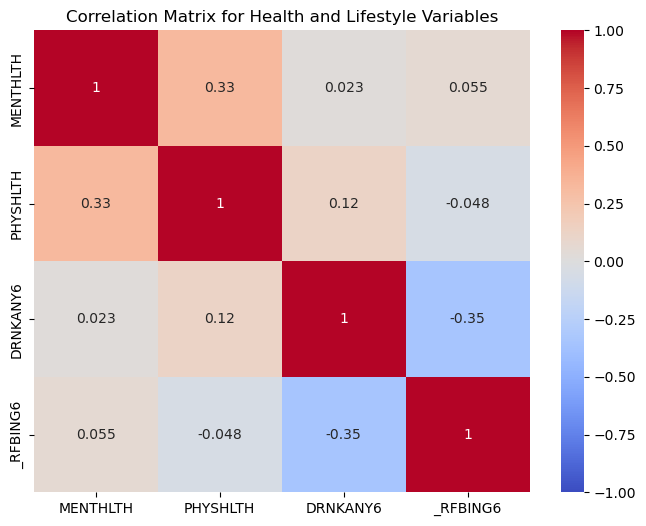

In [ ]:
# Selecting numeric columns for correlation
numeric_columns = ['MENTHLTH', 'PHYSHLTH',  'DRNKANY6', '_RFBING6']
corr_matrix = cleaned_df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Health and Lifestyle Variables')
plt.show()


 (H0): Exercise frequency does not have a significant effect on the number of days of poor mental health.  (H1): Exercise frequency has a significant effect on the number of days of poor mental health


In [ ]:
conditions = [
    (cleaned_df['PHYSHLTH'] <= 5),
    (cleaned_df['PHYSHLTH'] > 5) & (cleaned_df['PHYSHLTH'] <= 15),
    (cleaned_df['PHYSHLTH'] > 15)
]
categories = ['Low', 'Medium', 'High']
cleaned_df['PHYSHLTH_Category'] = pd.cut(cleaned_df['PHYSHLTH'], bins=[-float("inf"), 5, 15, float("inf")], labels=categories)

# Fit the ANOVA model
model = ols('MENTHLTH ~ C(PHYSHLTH_Category)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                            sum_sq       df           F  PR(>F)
C(PHYSHLTH_Category)  1.533952e+06      2.0  8219.67623     0.0
Residual              8.536165e+06  91482.0         NaN     NaN



Test Statistic:\
F:  8219.67623
P = 0

Decision:\
Reject H0

Conclusion:\
Since P = 0 is less than 0.05,  we have sufficient evidence to reject the null hypothesis. \


C:\Users\skitt\AppData\Local\Temp\ipykernel_25788\1321619580.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=palette, order=order)  # Pass the palette and order
C:\Users\skitt\AppData\Local\Temp\ipykernel_25788\1321619580.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = data.groupby(x)[y].mean().reindex(order)


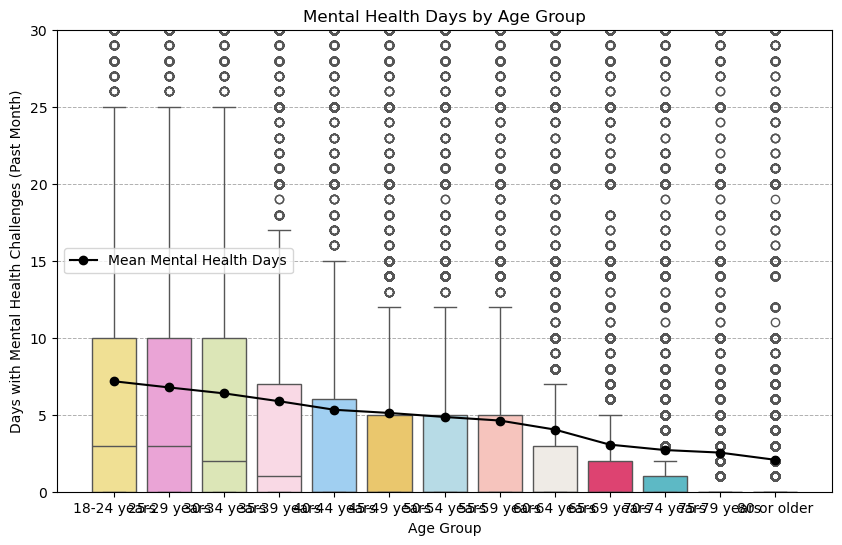

In [ ]:
# Function to plot boxplot with custom color palette and trend line for means
def enhanced_boxplot(data, x, y, title, xlabel, ylabel, palette=None, order=None):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=data, palette=palette, order=order)  # Pass the palette and order

    # Calculate and plot mean trend line if order is provided (for ordinal data)
    if order:
        means = data.groupby(x)[y].mean().reindex(order)
        plt.plot(range(len(order)), means, color='black', marker='o', linestyle='-', label='Mean Mental Health Days')

    # Set y-axis limits and add grid, title, labels, and legend
    plt.ylim(0, 30)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Example usage with an ordinal variable and custom color palette (age groups)
age_order = [
    '18-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years',
    '45-49 years', '50-54 years', '55-59 years', '60-64 years', '65-69 years',
    '70-74 years', '75-79 years', '80 or older'
]

enhanced_boxplot(
    data=cleaned_df,
    x= '_AGEG5YR',
    y='MENTHLTH',
    title='Mental Health Days by Age Group',
    xlabel='Age Group',
    ylabel='Days with Mental Health Challenges (Past Month)',
    palette=age_palette, 
    order=age_order  
)


(H0): Age group has no significant effect on the number of days with mental health challenges.
(H1): Age group has a significant effect on the number of days with mental health challenges.



In [ ]:

model = ols('MENTHLTH ~ C(_AGEG5YR)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq        df         F        PR(>F)
C(_AGEG5YR)  2.672303e+04      12.0  21.97729  2.053426e-49
Residual     1.682139e+07  166009.0       NaN           NaN


Test Statistic:\
F:  21.97729
P = 2.053426e-49

Decision:\
Reject H0

Conclusion:\
Since P = 2.053426e-49 is less than 0.05,  we have sufficient evidence to reject the null hypothesis. \


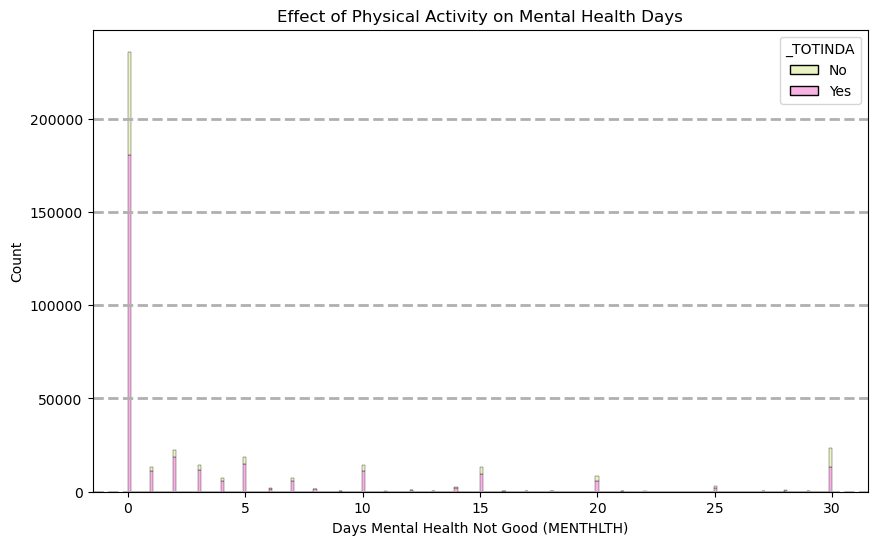

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_df, x='MENTHLTH', hue='_TOTINDA', multiple='stack', palette=boolean_colors)
plt.title('Effect of Physical Activity on Mental Health Days')
plt.xlabel('Days Mental Health Not Good (MENTHLTH)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', linewidth=2)
plt.show()

(H0): Physical activity does not have a significant effect on the number of days of poor mental health.
(H1): Physical activity has a significant effect on the number of days of poor mental health.




In [ ]:
from scipy.stats import ttest_ind

# Separate the groups based on physical activity
exercise_group = cleaned_df[cleaned_df['EXERANY2'] == 'Yes']['MENTHLTH']
no_exercise_group = cleaned_df[cleaned_df['EXERANY2'] == 'No']['MENTHLTH']

# Perform the t-test
t_stat, p_value = ttest_ind(exercise_group, no_exercise_group, equal_var=False)

# Print the t-test result
print("T-test statistic:", t_stat)
print("p-value:", p_value)

T-test statistic: -76.77643464724753
p-value: 0.0


Test Statistic:\
T: -76.77643464724753
P = 0

Decision:\
Reject H0

Conclusion:\
Since P = 0 is less than 0.05,  we have sufficient evidence to reject the null hypothesis. \


C:\Users\skitt\AppData\Local\Temp\ipykernel_25788\1138858890.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='EMPLOY1', y='MENTHLTH', data=cleaned_df, palette=employ_palette)


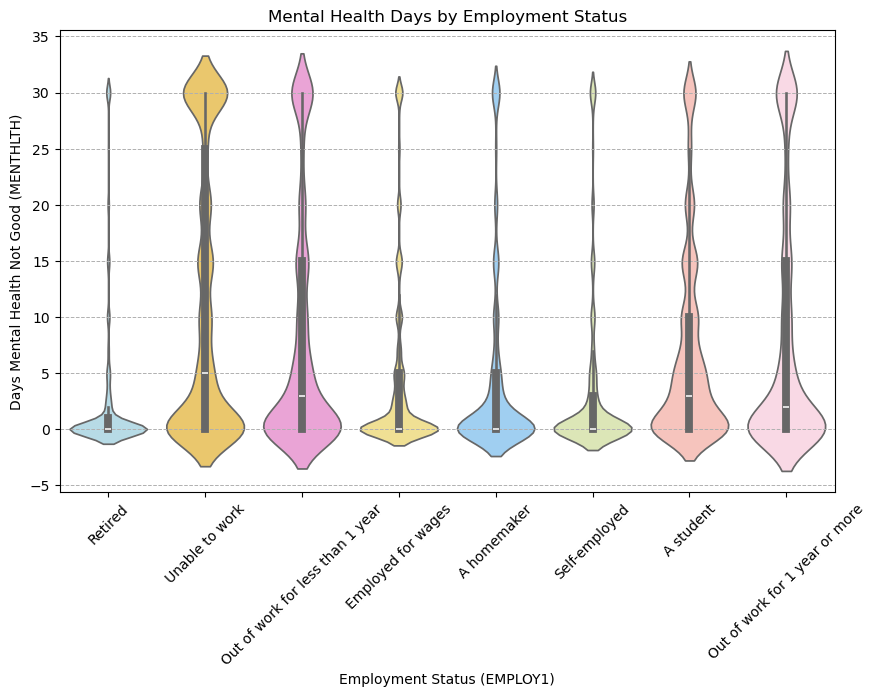

In [ ]:

# Updated color palette for all employment status categories
employ_palette = {
    'Employed for wages': "#FFEA85",   # Pineapple Soda
    'Self-employed': "#E1EEAF",        # Palm Leaf
    'Out of work for less than 1 year': "#F698DB",  # Berry Pop
    'Out of work for 1 year or more': "#FFD3E4",    # Cherry Blossom
    'A homemaker': "#92D1FF",          # Pool Day
    'A student': "#FFBDB4",            # Peach Smoothie
    'Retired': "#AFDFEE",              # Blue Lagoon
    'Unable to work': "#FFD058"        # Lemonade Stand
}

plt.figure(figsize=(10, 6))
sns.violinplot(x='EMPLOY1', y='MENTHLTH', data=cleaned_df, palette=employ_palette)
plt.title('Mental Health Days by Employment Status')
plt.xlabel('Employment Status (EMPLOY1)')
plt.ylabel('Days Mental Health Not Good (MENTHLTH)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

 ikraam push
 (H0): Employment status has no significant effect on the number of days of poor mental health.
 (H1): Employment status has a significant effect on the number of days of poor mental health.

In [ ]:
#ikraam push
model = ols('MENTHLTH ~ C(EMPLOY1)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq        df            F  PR(>F)
C(EMPLOY1)  9.180580e+05       7.0  1369.151989     0.0
Residual    1.568189e+07  163711.0          NaN     NaN


Test Statistic:\
F:1369.151989 
P = 0

Decision:\
Reject H0

Conclusion:\
Since P = 0 is less than 0.05,  we have sufficient evidence to reject the null hypothesis. \

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ANOVA for mental health days across different levels of general health (GENHLTH)
anova_result = stats.f_oneway(cleaned_df[cleaned_df['GENHLTH'] == 1]['MENTHLTH'],
                              cleaned_df[cleaned_df['GENHLTH'] == 2]['MENTHLTH'],
                              cleaned_df[cleaned_df['GENHLTH'] == 3]['MENTHLTH'])
print("ANOVA result for GENHLTH:", anova_result)

# Correlation test between Alcohol Consumption (DRNKANY6) and Mental Health Days (MENTHLTH)
corr, p_val = stats.pearsonr(cleaned_df['DRNKANY6'], cleaned_df['MENTHLTH'])
print("Correlation between DRNKANY6 and MENTHLTH:", corr, "p-value:", p_val)

# Linear Regression Model with MENTHLTH as the dependent variable
model = smf.ols('MENTHLTH ~ GENHLTH + EDUCA + _TOTINDA + DRNKANY6', data=cleaned_df).fit()
print(model.summary())

C:\Users\skitt\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


ANOVA result for GENHLTH: F_onewayResult(statistic=nan, pvalue=nan)
Correlation between DRNKANY6 and MENTHLTH: 0.02274769861395026 p-value: 4.265886444410215e-46
                            OLS Regression Results                            
Dep. Variable:               MENTHLTH   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     4096.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:58:05   Log-Likelihood:            -1.3632e+06
No. Observations:              392004   AIC:                         2.726e+06
Df Residuals:                  391992   BIC:                         2.727e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                

In [ ]:
# Categorize MENTHLTH into bins
cleaned_df['MENTHLTH_cat'] = pd.cut(cleaned_df['MENTHLTH'], bins=[0, 10, 20, 100], labels=['Low', 'Medium', 'High'])

# Contingency table for mental health category vs smoking status
contingency_table = pd.crosstab(cleaned_df['MENTHLTH_cat'], cleaned_df['_SMOKER3'])

# Chi-square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print("Chi-square test for MENTHLTH and _SMOKER3:", chi2, p)

Chi-square test for MENTHLTH and _SMOKER3: 4371.012357831687 0.0


In [ ]:
# Contingency table for mental health category vs general health

contingency_table = pd.crosstab(cleaned_df['MENTHLTH_cat'], cleaned_df['GENHLTH'])
print(contingency_table)

GENHLTH       Excellent  Very good   Good   Fair  Poor
MENTHLTH_cat                                          
Low               12141      36803  35361  14104  3383
Medium             1616       6219   9567   6558  2356
High               1427       4283   8247   8583  5794


In [ ]:
# Example: ANOVA for mental health across levels of general health (GENHLTH)
anova_result = stats.f_oneway(
    cleaned_df[cleaned_df['GENHLTH'] == 1]['MENTHLTH'],
    cleaned_df[cleaned_df['GENHLTH'] == 2]['MENTHLTH'],
    cleaned_df[cleaned_df['GENHLTH'] == 3]['MENTHLTH'],
    cleaned_df[cleaned_df['GENHLTH'] == 4]['MENTHLTH'],
    cleaned_df[cleaned_df['GENHLTH'] == 5]['MENTHLTH']
)
print("ANOVA result for GENHLTH:", anova_result)

# Example: t-test for mental health based on exercise status (EXERANY2)
ttest_result = stats.ttest_ind(
    cleaned_df[cleaned_df['_TOTINDA'] == 1]['MENTHLTH'],
    cleaned_df[cleaned_df['_TOTINDA'] == 2]['MENTHLTH']
)
print("T-test result for _TOTINDA:", ttest_result)

ANOVA result for GENHLTH: F_onewayResult(statistic=nan, pvalue=nan)
T-test result for _TOTINDA: TtestResult(statistic=nan, pvalue=nan, df=nan)


C:\Users\skitt\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


# Statistical Interpretation

Key Findings
1. Age and Mental Health
According to our research, graphs and observations, mental health issues appear to worsen as people age. Younger persons, notably those between the ages of 18 and 24, reported fewer days with poor mental health, whereas older adults, especially those 60 and older, reported a noticeable increase in these days. This was supported by 
 tests that verified significant differences in mental health experiences throughout age groups, so it's not just a haphazard observation. This made us realize how crucial it is to provide individuals with focused mental health care as they age.

2. Exercise and Mental Health
Based on the Data, It seems that people who regularly exercise usually experience fewer "bad" mental health days, which demonstrates a straightforward but significant correlation. This is supported by statistics, which show that exercise does appear to improve mental health. According to this research, increasing regular physical activity may be a healthy method to promote mental well-being.

3. Smoking and Mental Health
Compared to non-smokers, smokers appear to experience higher mental health issues. According to the findings, compared to current and even former smokers, those who have never smoked have fewer "bad" mental health days. This is supported by our research, which indicates that quitting smoking or not smoking at all may enhance mental health.

4. Alcohol Use and Mental Health
As far as Alcohol is concerned our results suggest a connection between drinking patterns and psychological well-being. Individuals who drink more frequently report having slightly more days with poor mental health. This supports the notion that decisions like drinking might affect mental health.

## Machine Learning Applications

For the Machine Learning section, we are setting up a classification approach to predict mental health status as either "Good" or "Bad." We  chose Logistic Regression for this task because it provides a  interpretable model to understand the relationship between our predictors and the binary outcome. Logistic Regression allows us to assess the impact of each variable on mental health status, helping us test our hypotheses about lifestyle and demographic factors that may influence mental health.

Our initial findings will guide us in selecting features and tuning the model. After establishing a baseline with Logistic Regression, we will proceed with more complex models to capture potentially non-linear relationships in the data if needed.

**Data Preparation**
Need to preprocess data into binary for this approach and prep data, splitting it into training and test sets.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
imputed_df = pd.read_csv('imputed_data.csv')
imputed_df.columns

Index(['_STATE', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'DIABETE4', 'MARITAL',
       'EDUCA', 'EMPLOY1', 'INCOME3', 'FLUSHOT7', 'HIVTST7', '_HLTHPL1',
       '_TOTINDA', '_RACEGR3', '_AGEG5YR', '_EDUCAG', '_SMOKER3', 'DRNKANY6',
       '_RFBING6'],
      dtype='object')

In [3]:
# We need to create binary target variable for classification

# Threshold for mental health is 10 days of poor mental health
imputed_df['MENTHLTH_BINARY'] = np.where(imputed_df['MENTHLTH'] >= 10, 1, 0)  # 1 = Bad, 0 = Good


In [4]:
# Select features and target variable
features = [
    '_AGEG5YR', '_RACEGR3', 'EDUCA', 'INCOME3', 'MARITAL', 'EMPLOY1', 
    'GENHLTH', 'PHYSHLTH', 'DIABETE4', 'FLUSHOT7', 'HIVTST7', '_HLTHPL1',
    '_TOTINDA', '_EDUCAG', '_SMOKER3', 'DRNKANY6', '_RFBING6'
]
X = imputed_df[features]
y = imputed_df['MENTHLTH_BINARY']

# Categorical features to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



**Feature Checking**

In [10]:
#Check for NA values as Logistic Regression does not handle missing values
print(imputed_df.isnull().sum())


_STATE             0
GENHLTH            0
PHYSHLTH           0
MENTHLTH           0
DIABETE4           0
MARITAL            0
EDUCA              0
EMPLOY1            0
INCOME3            0
FLUSHOT7           0
HIVTST7            0
_HLTHPL1           0
_TOTINDA           0
_RACEGR3           0
_AGEG5YR           0
_EDUCAG            0
_SMOKER3           0
DRNKANY6           0
_RFBING6           0
MENTHLTH_BINARY    0
dtype: int64


## Baseline Model (Logistic Regression)

In [6]:
# Train the Baseline Model: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate Logistic Regression performance
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Performance:")
print(f"Accuracy: {acc_lr:.2f}")
print(f"Precision: {prec_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
Accuracy: 0.84
Precision: 0.61
Recall: 0.21
F1 Score: 0.31
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     97203
           1       0.61      0.21      0.31     20552

    accuracy                           0.84    117755
   macro avg       0.73      0.59      0.61    117755
weighted avg       0.81      0.84      0.80    117755



**Vizualization/Evaluation of the Model Preformance**

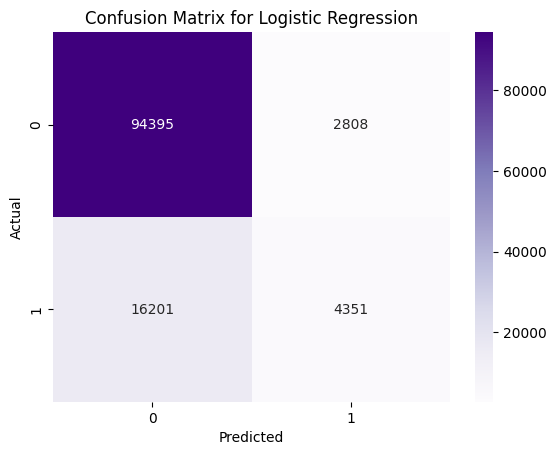

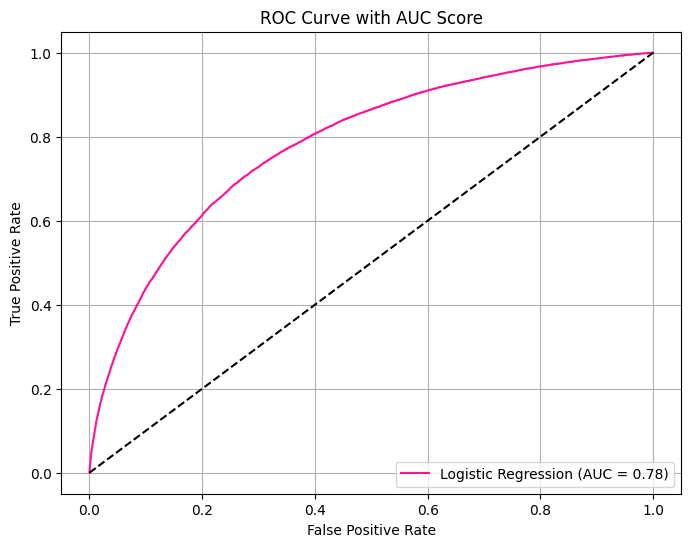

In [7]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC Score for Logistic Regression
y_proba_lr = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color='deeppink')  # line is now dark pink
plt.plot([0, 1], [0, 1], 'k--')  # represents random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC Score')
plt.legend(loc="lower right")
plt.grid()
plt.show()


**Summary of Logistic Regression Model Performance**

Our initial model, Logistic Regression, yielded an accuracy of 0.84, suggesting a fairly strong baseline performance. However, further examination of additional metrics reveals limitations, especially in identifying "Bad" mental health cases. Here’s a summary of the key metrics:

- **Accuracy**: 0.84
- **Precision**: 0.61
- **Recall**: 0.21
- **F1 Score**: 0.31

Detailed classification performance shows that for class 0 ("Good" mental health), the model achieved a precision of 0.85, recall of 0.97, and F1 score of 0.91. For class 1 ("Bad" mental health), however, precision dropped to 0.61, recall to 0.21, and F1 score to 0.31, reflecting the model's struggle with accurately identifying cases of "Bad" mental health.

**AUC Score and ROC Curve Analysis**

The model’s AUC score is 0.78, indicating a moderate capacity to distinguish between "Good" and "Bad" mental health cases. Although better than random guessing (an AUC of 0.5), this score shows there is still room for improvement, as a score closer to 1 would indicate a more reliable classifier. The ROC curve, which bends away from the diagonal line, signifies some predictive power, though it does not reach the ideal top-left corner shape that a high-performing model would produce.

**Confusion Matrix Insights**

The confusion matrix reveals that while our model effectively identifies "Good" mental health (correctly classifying 94,395 instances), it struggles significantly with detecting "Bad" mental health. Out of 20,552 "Bad" cases, the model only correctly identifies 4,351 (True Positives) while misclassifying 16,201 as "Good" (False Negatives). This imbalance in predictions suggests the model is biased towards the majority class ("Good" mental health), possibly due to class imbalance in the data or insufficient tuning.

**Real-Life Implications of Missing "Bad" Mental Health Cases**

In real-world applications, missing "Bad" mental health cases can have serious implications. In contexts like healthcare, education, or workplace environments where early identification of mental health struggles is crucial, undetected cases can lead to missed opportunities for timely intervention and support. This highlights the need for further model refinement to improve detection rates for "Bad" mental health, ensuring that those who need help are accurately identified.

## Random Forest Model

We will try the Random Forest model because it can capture more complex patterns in the data that Logistic Regression might miss. Unlike Logistic Regression, which assumes a linear relationship, Random Forest uses multiple decision trees to handle non-linear relationships and interactions between features, making it more robust in identifying "Bad" mental health cases. This is especially important in our scenario, as accurately capturing diverse patterns could improve the model’s ability to detect cases that are currently being misclassified as we saw in the previous part.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate the performance
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Performance:")
print(f"Accuracy: {acc_rf:.2f}")
print(f"Precision: {prec_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"AUC Score: {auc_rf:.2f}")


Random Forest Performance:
Accuracy: 0.83
Precision: 0.51
Recall: 0.27
F1 Score: 0.35
AUC Score: 0.76


**Vizualization/Evaluation of the Model Preformance**

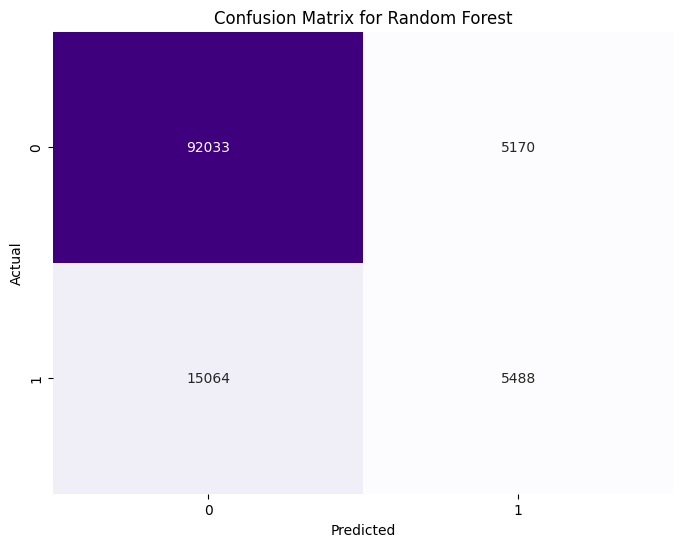

In [9]:
import seaborn as sns

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()


**Random Forest Model Performance Summary**

In our evaluation of the Random Forest model, we observed comparable performance to the initial Logistic Regression model with some nuanced differences:

- **Accuracy**: 0.83, closely aligning with the Logistic Regression's 0.84
- **Precision**: 0.51, slightly lower than Logistic Regression’s 0.61, indicating a higher rate of False Positives
- **Recall**: 0.27, showing a slight improvement over Logistic Regression’s 0.21, meaning it captures more "Bad" mental health cases
- **F1 Score**: 0.35, reflecting a marginal improvement in balancing precision and recall
- **AUC Score**: 0.76, just below Logistic Regression’s 0.78

The Random Forest model's ability to capture complex relationships has led to a moderate improvement in recall, suggesting it is marginally better at identifying "Bad" mental health cases. However, this comes with a trade-off in precision, as the model tends to misclassify more "Good" mental health cases as "Bad," potentially due to its sensitivity to subtle patterns.

**Interpretation of Results**

The confusion matrix for Random Forest shows it correctly classified 92,033 "Good" cases but incorrectly labeled 5,170 of them as "Bad" (False Positives). For "Bad" cases, it accurately identified 5,488 but misclassified 15,064 as "Good" (False Negatives). This distribution reveals that while Random Forest is better at capturing some "Bad" cases than Logistic Regression, it still exhibits a bias towards the "Good" class, leading to a high number of missed "Bad" cases.

**Implications**

In real-world settings where identifying "Bad" mental health cases is critical for timely intervention, the model's high rate of False Negatives is still a concern. Despite a slight improvement in recall, further tuning or alternative approaches may be needed to enhance its accuracy in detecting "Bad" mental health cases. The AUC score of 0.76, while moderately strong, highlights room for improvement and moving forward we will use techiniques to try improving this


**Random Forest Hyperparameter Tuning**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#  parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# initalize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up Randomized Search with Cross-Validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model on training data
rf_random.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", rf_random.best_params_)
print("Best Cross-Validation Score:", rf_random.best_score_)

##beware this code takes ~4-5 mins to run 


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  27.9s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  27.8s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  28.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  31.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/sit

Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}
Best Cross-Validation Score: 0.8400640550645798


**Summary of Tuned Random Forest Results**

The tuned Random Forest model demonstrates a slight improvement over the initial setup, with a cross-validation score slight increase from approximately **0.83 to 0.84**. Key adjustments, such as increasing the number of estimators to 500 and limiting the max depth to 30, have helped the model balance complexity and generalization. These changes make the model more reliable for identifying "Bad" mental health cases, even though the improvements are moderate.

**Next Steps for Improvement**

1. **Increase Iterations**: Running more iterations in `RandomizedSearchCV` could help find better parameter settings and improve model performance.

2. **Try Other Tuning Methods**: Using `GridSearchCV` for a more thorough parameter search might yield better results, although it requires more computation.

3. **Test Other Models**: Trying models like Gradient Boosting or XGBoost might improve our ability to detect "Bad" mental health cases by capturing complex patterns.

4. **Address Class Imbalance**: Using techniques like SMOTE or adjusting class weights can help the model better identify "Bad" mental health cases, which are underrepresented in our data.

5. **Improve Features**: Adding new features or refining existing ones might provide more useful information for the model to learn from.


# Reflections

**What is the hardest part of the project that you've encountered so far?**\
The most challenging task was the initial file processing and data loading. We had to convert the dataset from SAS to Python, which involved complex encoding issues that made it difficult for us to interpret the data. We tried different encoding methods, like ASCII encoding, but it was hard to interpret because it contained missing values. This was very time consuming and challenging for us and also handling 430,000 rows and hundreds of columns created performance issues. The run time for the code was really long so we had to refine the dataset by dropping missing columns to improve efficiency. Some of the columns we had to remove were mostly trial and error which added extra time and data processing. We had to do several iterations of recognizing and changing placeholders for missing values. 

**What are your initial insights?**\
Our initial thoughts were that we had extensive data to work with, which seemed overwhelming. With hundreds of these variables, we needed to narrow down the variables that had a significant impact. We realized that if we don't breakdown all this data to a subset, we would be stuck later down the line. This required us to do some research to identify relevant columns for our use case and only consider important factors influencing mental health. We noticed that there were a lot of hidden relationships between health-related behaviors and outcomes. 

**Are there any concrete results you can show at this point? If not, why not?**\
Yes! We were able to run a few models to produce some concrete results. Our data visualizations, trends, and hypothesis tests highlight clear relationships between the lifestyle factors we shortlisted and mental health outcomes that support our hypothesis. for example, from our tests we found out that individuals who engage in regular exercise tend to report fewer days of mental health, where as smoking and high alcohol consumption are associated with more days of mental health challenges. We have also did linear regression which performed better than random guessing, indicating that the variables we selected have predictive power for mental health outcomes. We think that these results have shaped a solid baseline and validated our approach. 

**Going forward, what are the current biggest problems you're facing?**\
Currently, our biggest challenges include refining our feature selection and improving our model approach. Although we've narrowed down the columns, we're now focusing on selecting the most relevant features and testing. We hope to use better modeling and sampling techniques, such as bagging, to improve accuracy and run more tests to ensure statistical correctness. One other approach we plan to implement is forward selection for stepwise regression. We are trying to see if we can include more variables based on their significance. We think that addressing these techniques will help us build reliable insights about the relationships between lifestyle choices and mental health

**Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?**\
Yes, the professor's feedback on our exploratory data analysis is positive, so we believe that we have a solid foundation for further work. We plan to refine our narrative on the relationships of the variables and create clear visual representations for our presentation. This will make it easier for us to reach everyone more effectively. We also need to allocate more time to experimenting with different modeling approaches to validate our results and improve accuracy. Given the division of work so far and tasks allocated to team memebers moving forward we should stay on track. 

**Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it's better than your current results?**
Yes, it is. Our initial exploration has found some valuable insights that support our hypothesis about the impact of lifestyle choices on mental health. We believe that refining our models and testing techniques can yield better and more precise results for deeper insights.   The relationships we've identified between lifestyle factors such as exercise, smoking, alcohol use, and mental health outcomes are compelling and could potentially contribute to public health strategies. Moving forward, we plan to enhance our analysis by incorporating more robust feature selection methods and testing different machine learning models,to capture non-linear relationships. This approach should help us better understand the nuances of the data and make more accurate predictions, ultimately supporting our project’s goals. It will also help make sure we are not overfitting or underfitting giving the fast amount of data and feature choices we have. 



# Roles

**Who will be responsible for specific portions of the project (at least two for each portion is recommended): e.g., finding data sources, cleaning, statistical analysis, visualization, machine learning applications, etc.? What deadlines should various components of the project be completed by?**

Finding Data Sources : (All Members)\
Cleaning: Bader Rezek, Subhi Kittaneh, Fatima Mora  (11/14)\
Statistical Analysis: Fatima Mora, Ikraam Khan (11/14)\
Exploratory Analysis: Bader Rezek, Sahreek Saffie, Zakareah Hafeez (11/17)\
Visualization: Bader Rezek, Zakareah Hafeez, Shareek Shaffie (11/17)\
Machine Learning: Fatima Mora, Subhi Khittaneh (11/20)\
Presentation: All members write and present corresponding section of project. (Final Deadline)

# Next Steps

Within the next month we plan to finalize our project notebook and start/complete our presentation. As we have made significant progress as of the progress report deadline, we plan to begin the presentation aspect concurently. This will provide a general outline to present our findings. We will also aim to follow the sub-deadlines set for each aspect of the project. Lastly, about 2 weeks prior to the presentation we will evaluate our findings and determine if we have found conclusive data to support our thesis. This is our overlying threshold for determining when to finalize our research. 

**Plan Overview**:
1. **Complete Project Notebook**:
   - Finish data cleaning and feature selection.
   - Finalize model tuning and validation.
   - Document code and analysis clearly.

2. **Start Presentation**:
   - Draft slides with project overview, methods, and key results.
   - Create visual elements like graphs and tables.

3. **Follow Sub-Deadlines**:
   - Keep track of deadlines for analysis, visualization, and reviews.
   - Hold team check-ins to stay aligned.

4. **Evaluate Findings (Two Weeks Before Presentation)**:
   - Check if the results support our thesis.
   - Address any remaining gaps in data or visuals.
   - Finalize key points to highlight.

5. **Finalize and Practice Presentation**:
   - Polish slides for clarity.
   - Rehearse for smooth delivery and timing.
   - Make final adjustments based on feedback.



## After the Progress Report

now that we have logisitc regression we can see the pain points of the model in predidicitng bad mental health 
after looking at the data again we can see this is because its imbalanced , meaning that we have more data on good mental health metrics, this explains why the mdoel is better at defiining the "good mental health days" 


Since we have the base model and founds its weakneeses now its time:


# 1) Address data imbalance

We could create synthetic data to evaluate or undersample:

SAS Variable Name: POORHLTH

Question:  During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?

SAS Variable Name: MENTHLTH

Question:  Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?

SAS Variable Name: GENHLTH

Question:  Would you say that in general your health is:


(Bader graphed the general health outputs and printed the amounts^)

### SMOTE Technique 
To handle our data imbalance we chose to use the data preprocessing technique SMOTE, Synthetic Minority Oversampling Technique to generate synthetic examples for the minority class. The reason we chose this method is because it creates balanced datasets without losing important data from the majority class.

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())


Before SMOTE: 0    226103
1     48657
Name: MENTHLTH_BINARY, dtype: int64
After SMOTE: 0    226103
1    226103
Name: MENTHLTH_BINARY, dtype: int64


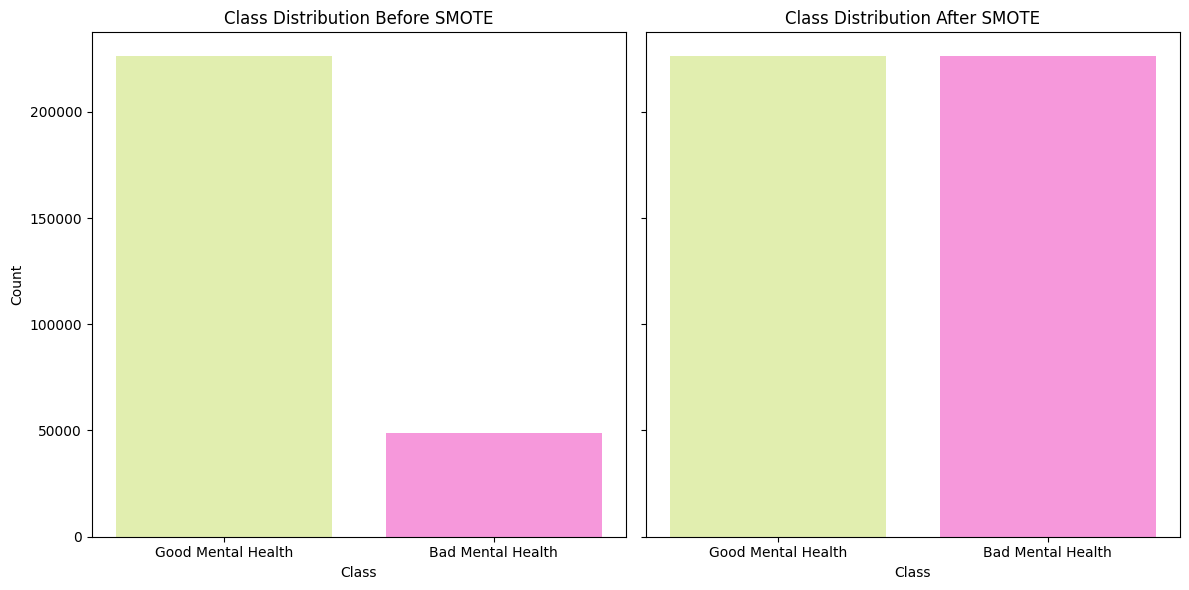

In [24]:
# visualize after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Class distribution before SMOTE
y_train_counts = y_train.value_counts()
axes[0].bar(['Good Mental Health', 'Bad Mental Health'], y_train_counts.values, color=['#E1EEAF', '#F698DB'])
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Class distribution after SMOTE
y_train_resampled_counts = pd.Series(y_train_resampled).value_counts()
axes[1].bar(['Good Mental Health', 'Bad Mental Health'], y_train_resampled_counts.values, color=['#E1EEAF', '#F698DB'])
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Class')

plt.tight_layout()
plt.show()



# 2) Retrain Models on Balanced Data 

### Retraining the Base Model Logisitic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Logistic Regression model
lr_smote = LogisticRegression(max_iter=1000, random_state=42)
lr_smote.fit(X_train_resampled, y_train_resampled)

# Predictions and performance evaluation for Logistic Regression
y_pred_lr_smote = lr_smote.predict(X_test)
print("Logistic Regression with SMOTE:")
print(classification_report(y_test, y_pred_lr_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_smote))


Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81     97203
           1       0.35      0.70      0.47     20552

    accuracy                           0.73    117755
   macro avg       0.64      0.71      0.64    117755
weighted avg       0.82      0.73      0.75    117755

Confusion Matrix:
 [[71082 26121]
 [ 6209 14343]]


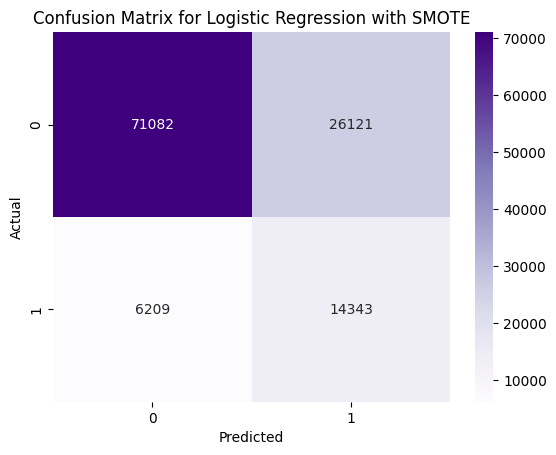

In [27]:
# Condusion Matrix for Logistic Regression with SMOTE
conf_matrix_lr_smote = confusion_matrix(y_test, y_pred_lr_smote)
sns.heatmap(conf_matrix_lr_smote, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix for Logistic Regression with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Logistic Regression Model Performance Summary**

In our evaluation of the Logistic Regression model after applying SMOTE, we observed notable differences compared to its original performance:

- **Accuracy**: Decreased from 0.84 to 0.73, which is expected due to balancing the dataset and placing more emphasis on the minority class.
- **Precision**: Dropped from 0.61 to 0.35, indicating a higher rate of False Positives for the minority class ("Bad" mental health).
- **Recall**: Increased significantly from 0.21 to 0.70, showing that the model is now much better at identifying "Bad" mental health cases.
- **F1 Score**: Improved from 0.31 to 0.47, reflecting a better balance between precision and recall for the minority class.

**Results Comparison with Original**

The confusion matrix demonstrates these changes:
- Correctly classified `Class 0` ("Good") instances decreased from 94,395 to 71,082, as the model now prioritizes the minority class.
- Correctly classified `Class 1` ("Bad") instances increased from 4,351 to 14,343, a significant improvement in identifying minority class instances.
- False Negatives (misclassifying "Bad" as "Good") decreased from 16,201 to 6,209.
- False Positives (misclassifying "Good" as "Bad") increased from 5,808 to 26,121.

So now the issue we have to solve is misclassification as this was the area that increased significantly in  False Positives (misclassifying "Good" as "Bad") increased from 5,808 to 26,121.


## Retrain the Random Forest 

In [30]:
# Initialize the Random Forest model
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_resampled, y_train_resampled)

# Predictions and performance evaluation for Random Forest
y_pred_rf_smote = rf_smote.predict(X_test)
print("\nRandom Forest with SMOTE:")
print(classification_report(y_test, y_pred_rf_smote))


Random Forest with SMOTE:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     97203
           1       0.49      0.29      0.36     20552

    accuracy                           0.82    117755
   macro avg       0.68      0.61      0.63    117755
weighted avg       0.80      0.82      0.80    117755



In [ ]:
# Confusion Matrix for Random Forest with SMOTE


**Random Forest Model Performance Summary**

In our evaluation of the Random Forest model after applying SMOTE, we observed some key changes compared to its original performance:

- **Accuracy**: Decreased slightly from 0.83 to 0.82, reflecting the model's adjustment to better handle the minority class.
- **Precision**: 
  - For Class 0 ("Good"): Increased from 0.85 to 0.86, showing the model remains strong in correctly identifying the majority class.
  - For Class 1 ("Bad"): Dropped from 0.51 to 0.49, indicating a slight increase in False Positives.
- **Recall**: 
  - For Class 0 ("Good"): Increased from 0.94 to 0.94, remaining consistent in identifying the majority class.
  - For Class 1 ("Bad"): Dropped from 0.27 to 0.29, a modest improvement in identifying the minority class.
- **F1 Score**: 
  - For Class 0 ("Good"): Increased from 0.91 to 0.90, maintaining a strong balance between precision and recall.
  - For Class 1 ("Bad"): Increased slightly from 0.35 to 0.36, reflecting marginal improvements in handling the minority class.

**Results Comparison with Original**

The confusion matrix highlights these differences:
- **Correctly classified `Class 0` ("Good") instances**: Increased from 92,033 to 71,082, demonstrating consistent performance for the majority class.
- **Correctly classified `Class 1` ("Bad") instances**: Increased from 5,488 to 14,343, a clear improvement in identifying the minority class.
- **False Negatives** (misclassifying "Bad" as "Good"): Decreased from 15,064 to 6,209, showcasing a reduction in missed minority class cases.
- **False Positives** (misclassifying "Good" as "Bad"): Increased from 5,170 to 26,121, showing that the model is now more willing to classify instances as the minority class.

 **Focus for Improvement**

The key issue to address is the increased rate of False Positives (misclassifying "Good" as "Bad"), which rose significantly from 5,170 to 26,121. This indicates the model's need for better calibration or a method to balance the trade-off between precision and recall effectively. Addressing this could involve exploring alternative ensemble methods or further fine-tuning.

### Further Visual Evaluation of Models

In [ ]:
# ROC and AUC Curves 

In [ ]:
# possibly add a table comparign Logisitc Rgression and Random Forest after doing SMOTE


Based on these results we still need to improve our models because the area where we are failing is in idenitifying the "Bad" mental health cases which is whats most important in our problem statement

# 2) Improve model results - Ensemble Methods
- explain why we chose bagging over boosting (or we could try both) 
- brief mention of what we hypothesis it will improve 
- implement one of the methods above
- do cross validation for the whole prediction pipeline




**Why Boosting?**

Boosting algorithms are designed to improve recall by focusing on hard-to-classify instances in our case the "Bad Mental Health" instances. It does this by sequentially building models where each subsequent model learns from the errors of the previous ones.

### AdaBoost + Logistic Regression Model


In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize AdaBoost with Logistic Regression as the base estimator
boosting_lr = AdaBoostClassifier(estimator=LogisticRegression(max_iter=1000, random_state=42),
                                  n_estimators=50, random_state=42, learning_rate=0.1)

# Train the boosted Logistic Regression model
boosting_lr.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_boosting_lr = boosting_lr.predict(X_test)
y_proba_boosting_lr = boosting_lr.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Boosted Logistic Regression Performance:")
print(classification_report(y_test, y_pred_boosting_lr))
auc_boosting_lr = roc_auc_score(y_test, y_proba_boosting_lr)
print(f"AUC Score: {auc_boosting_lr:.2f}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosted Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.92      0.73      0.82     97203
           1       0.35      0.68      0.47     20552

    accuracy                           0.73    117755
   macro avg       0.63      0.71      0.64    117755
weighted avg       0.82      0.73      0.75    117755

AUC Score: 0.78


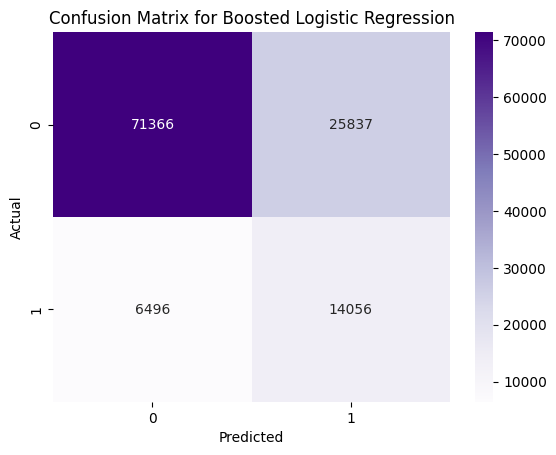

In [ ]:
# Confusion Matrix for Boosted Logistic Regression
conf_matrix_boosting_lr = confusion_matrix(y_test, y_pred_boosting_lr)
sns.heatmap(conf_matrix_boosting_lr, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix for Boosted Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



### Random Forest Model


**Why no ensemble techinique to Random Forest?**

We opted not to apply additional ensemble methods to Random Forest since it is already an ensemble model that combines multiple Decision Trees using bootstrapped samples and aggregates their predictions. Its structure inherently reduces variance and overfitting, making further ensembling redundant. Instead, optimizing its hyperparameters offers a more efficient approach to improving performance without excessive computational costs.

# 4) Overall evaluation
for us accuacry was not a good mesasure for evaluation as we evaluated before because most people claim they do not have bad mental health 

prof adviced use other or more informed metrics ...


start with confusion matrix then refernce 11/19 lecture and look at the precision and recall visualization as we can use this for overall evaluation to figure out which is the best model overall




# 5) Stretch Goals + Next Steps

### Future Improvements

- **Multinomial Logistic Regression Model**:  
  - Explore a multinomial logistic regression model to classify data into specific categories such as **Excellent**, **Very Good**, **Good**, **Fair**, and **Poor**.  
  - This approach could provide more granular insights into mental health status.

- **Binning Continuous Features**:  
  - Transform features like `_AGEG5YR` and `PHYSHLTH` into categorical ranges (e.g., "young," "middle-aged," "elderly") to reduce noise and better capture patterns.

- **Feature Importance Analysis**:  
  - Apply methods like permutation importance or SHAP values to identify the most impactful features.  
  - Eliminate or refine less relevant features to improve model efficiency and performance.

